<a href="https://colab.research.google.com/github/renzasprec/LoanApproval/blob/wip%2Ftorch/LoanApproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Libraries
import numpy as np
import pandas as pd

print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')

Numpy version: 1.26.4
Pandas version: 2.2.2


# Exploratory Data Analysis

## Importing Data

In [8]:
# import libraries

# importing data
import kagglehub # import data from kaggle

print(f'Kagglehub version: {kagglehub.__version__}')

Kagglehub version: 0.3.6


In [9]:
# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data", path = 'loan_data.csv')

print("Path to dataset files:", path)


100%|██████████| 3.44M/3.44M [00:00<00:00, 134MB/s]

Path to dataset files: /root/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1/loan_data.csv


In [10]:
# load dataset
df = pd.read_csv(path)
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

## Data Inspection

Head of the data

In [11]:
display(df.head())

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

Description of the data

In [12]:
display(df.describe())

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

Data information

In [13]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

None

Data shape

In [14]:
display(df.shape)

(45000, 14)

Unique values of the data

In [15]:
display(df.nunique())

person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

Check for missing values

In [16]:
# check if any of the data contains missing values
nas_sum = df.isna().any().sum()

print('There are {} features with missing data.'.format(nas_sum))

There are 0 features with missing data.


Getting the target variable

In [17]:
target = df.columns[-1]
print('The target variable is',target)

The target variable is loan_status


Feature names

In [18]:
feature_names = df.drop(target, axis=1).columns.to_list()

In [19]:
display(feature_names)

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'person_home_ownership',
 'loan_amnt',
 'loan_intent',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file']

Get the categorical features and the numerical features

Numerical features

In [20]:
numerical_features = df.drop(target, axis=1).select_dtypes(include=['float64','int64']).columns.to_list()
display(numerical_features)

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

Categorical features

In [21]:
categorical_features = df.drop(target, axis=1).select_dtypes(include='object').columns.to_list()
display(categorical_features)

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

## Data Analysis

In [22]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

print(f'Seaborn version: {sns.__version__}')

Seaborn version: 0.13.2


In [23]:
# set theme
sns.set_theme()

### Univariate Analysis

Analysis of individual variables

#### Target Variable

Distribution of the target variable

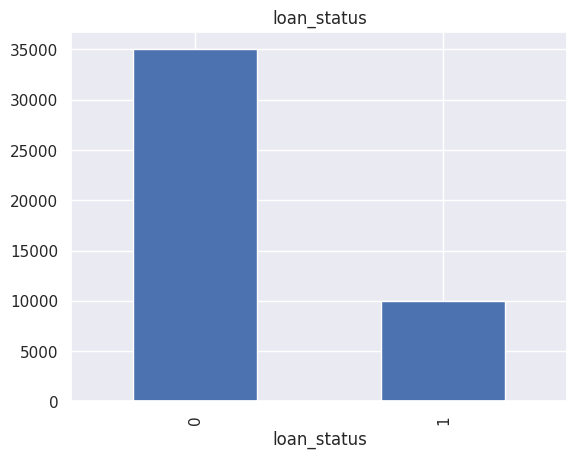

In [24]:
df[target].value_counts().plot.bar();
plt.title(target);
plt.show();

#### Numerical Features

Histograms of the numerical features

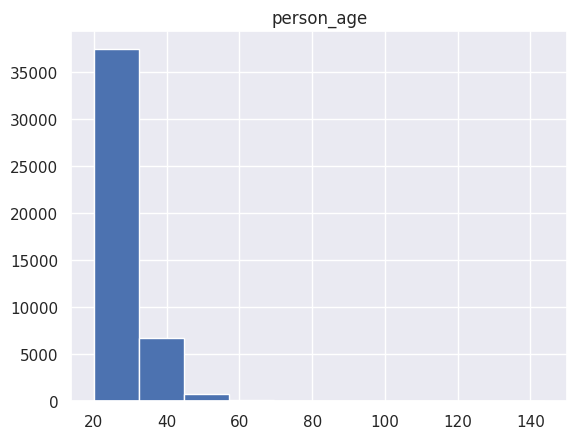

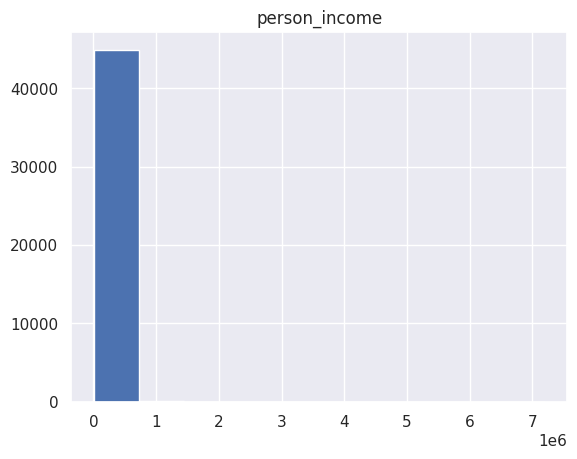

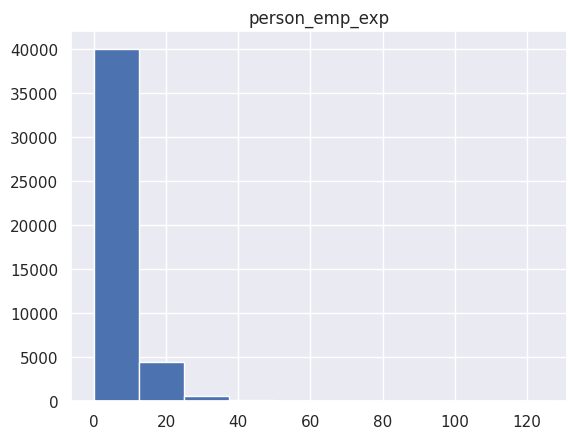

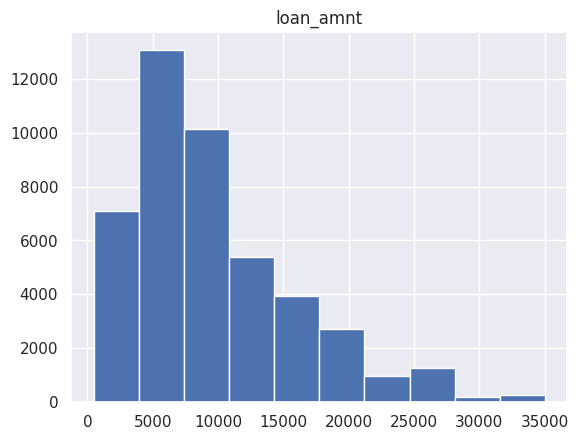

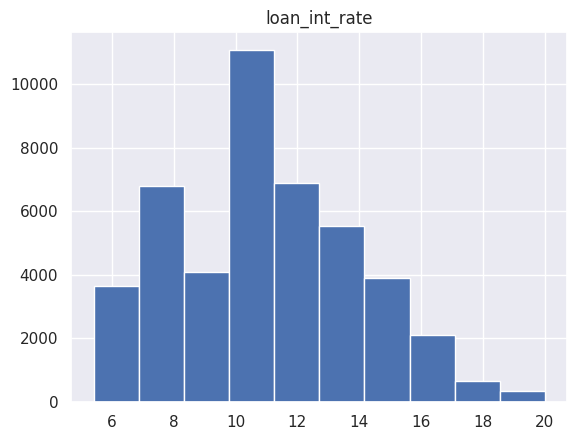

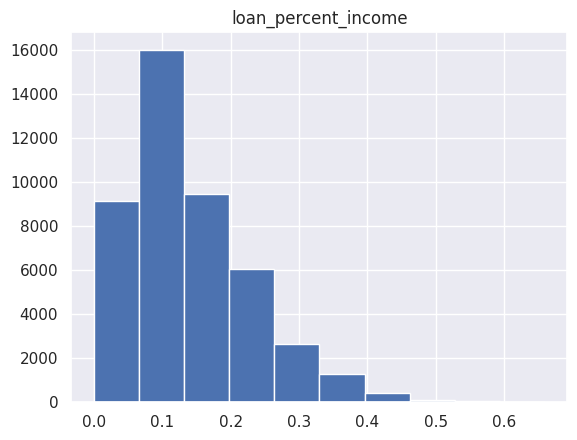

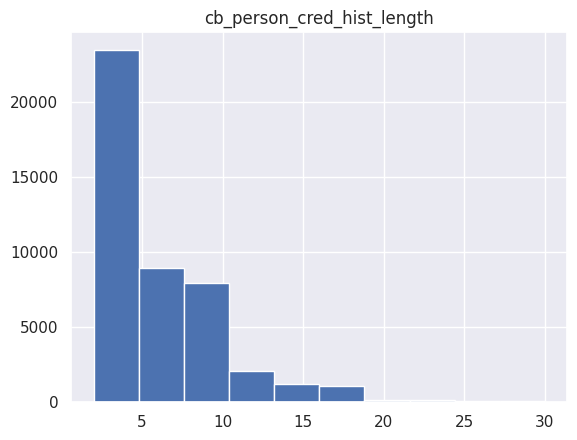

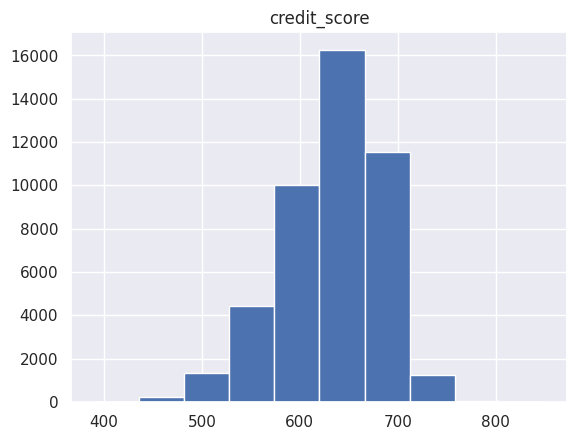

In [25]:
for feature in numerical_features:
    df[feature].hist();
    plt.title(feature);
    plt.show();

Box plots of the numerical features

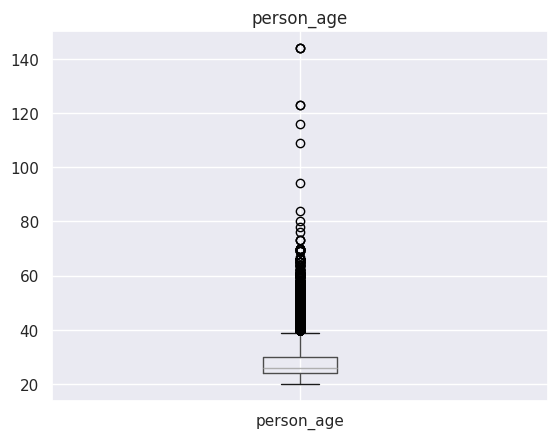

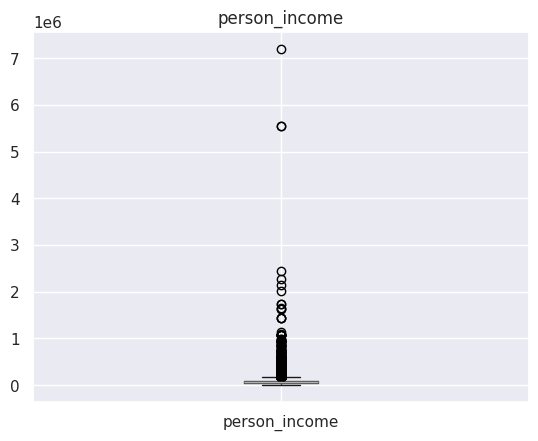

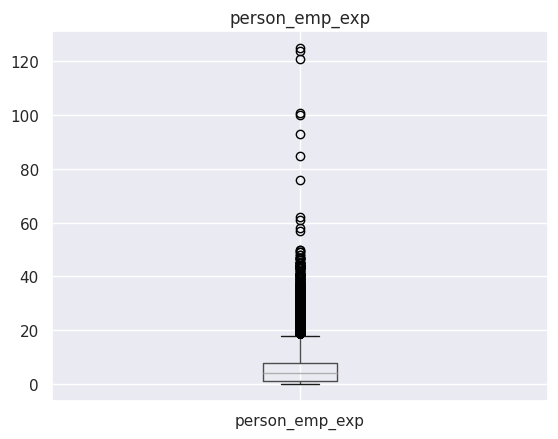

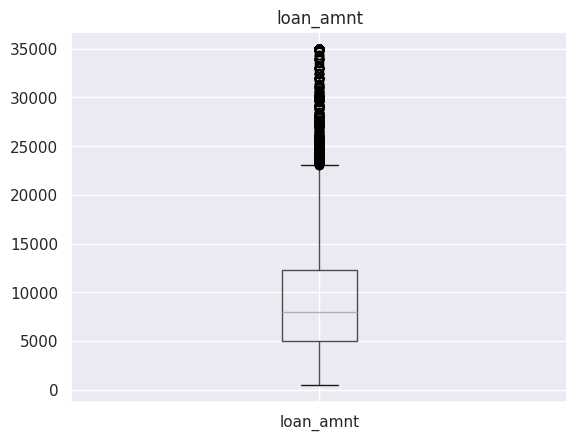

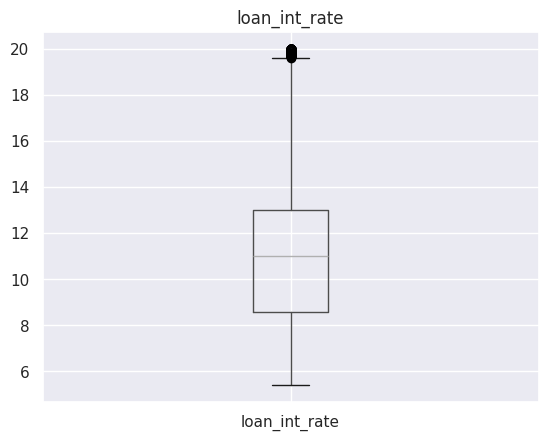

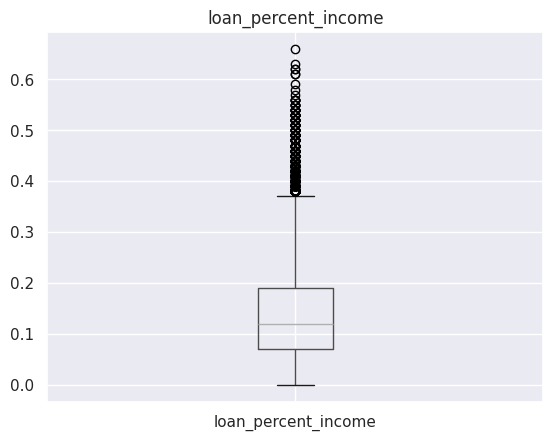

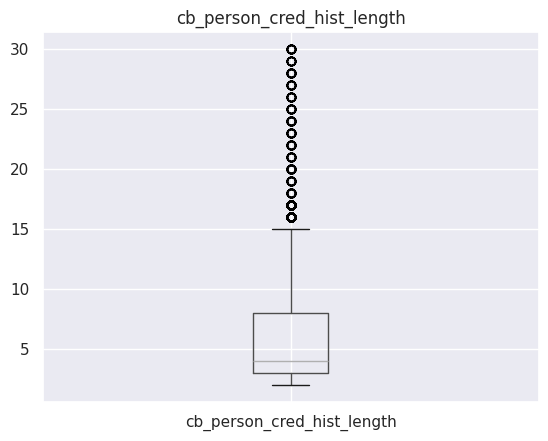

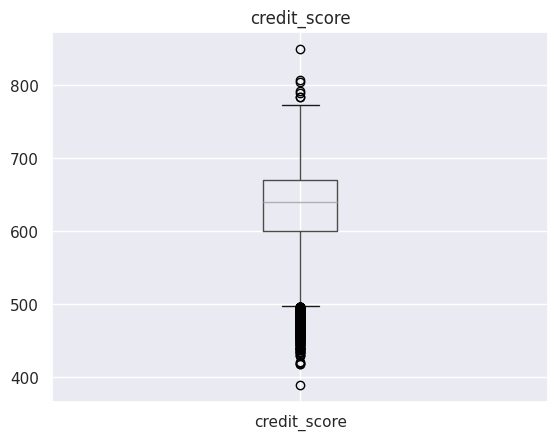

In [26]:
for feature in numerical_features:
    df[[feature]].boxplot();
    plt.title(feature);
    plt.show();

#### Categorical Feautures

Distributions of categorical features

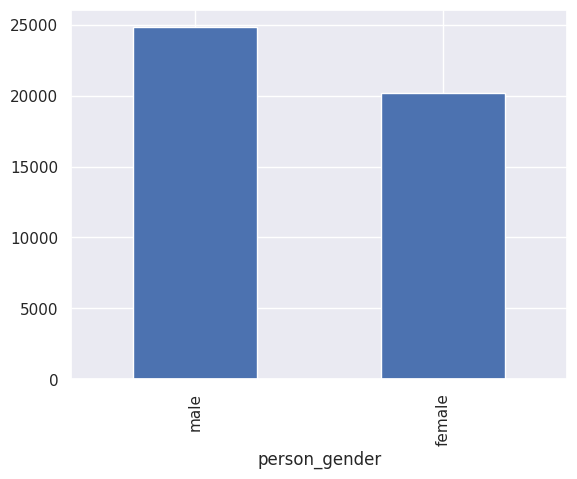

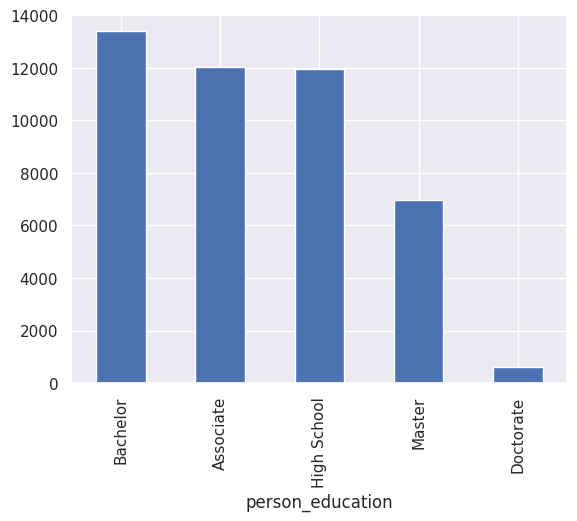

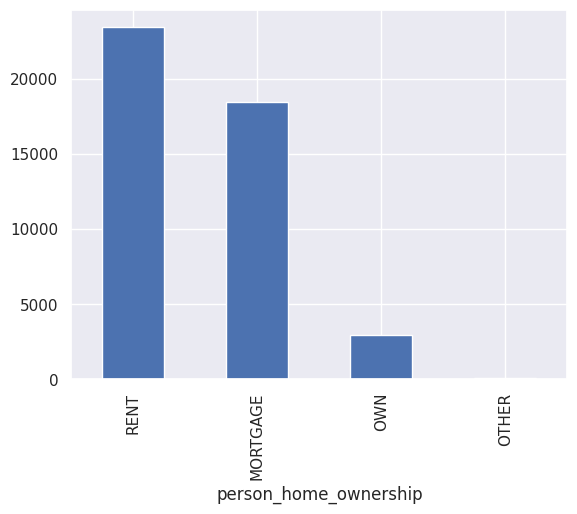

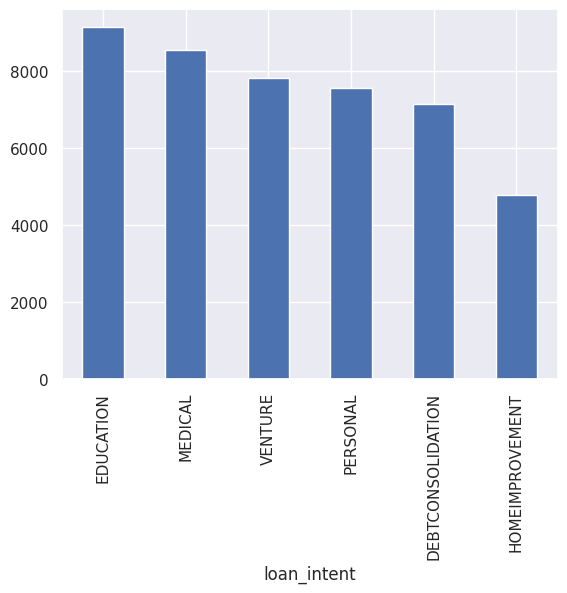

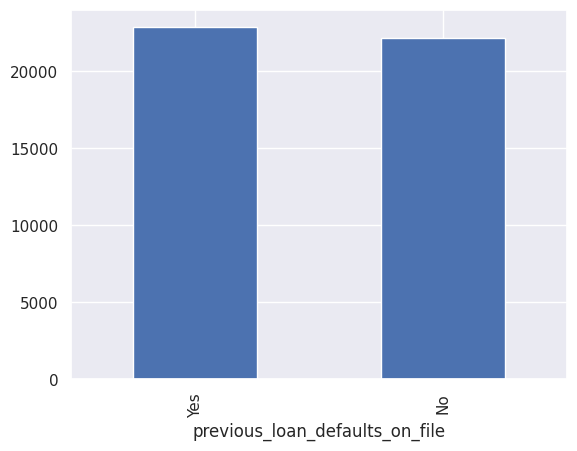

In [27]:
for feature in categorical_features:
    df[feature].value_counts().plot.bar();
    plt.xticks(rotation=90);
    plt.show();

### Bivariate Analysis

#### Numerical Features

Distribution of each numerical feature by loan status

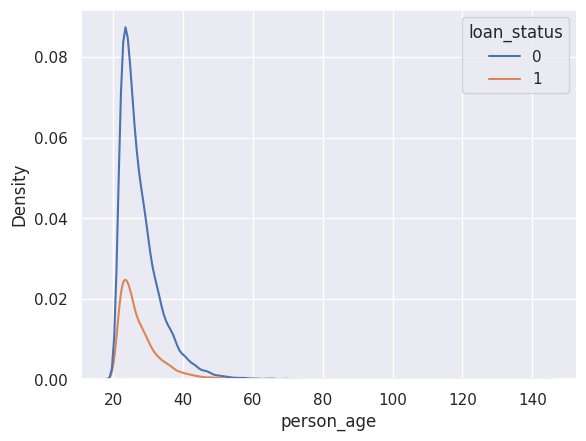

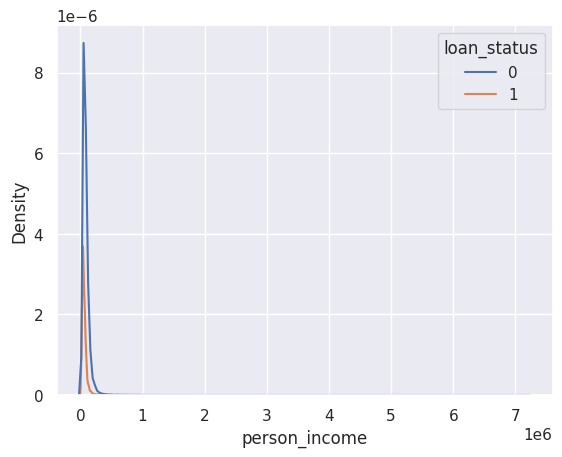

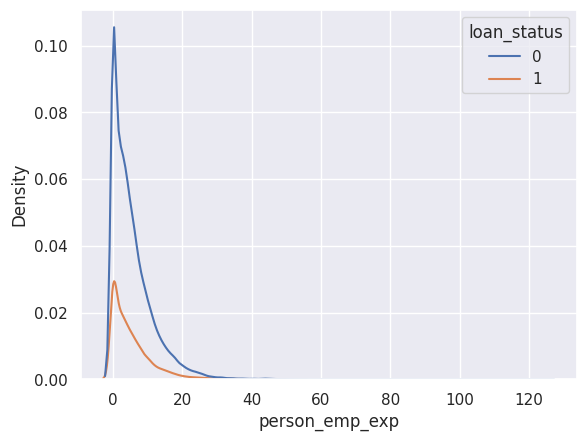

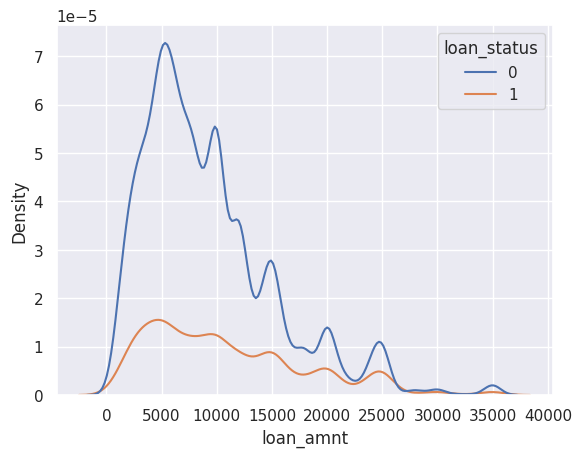

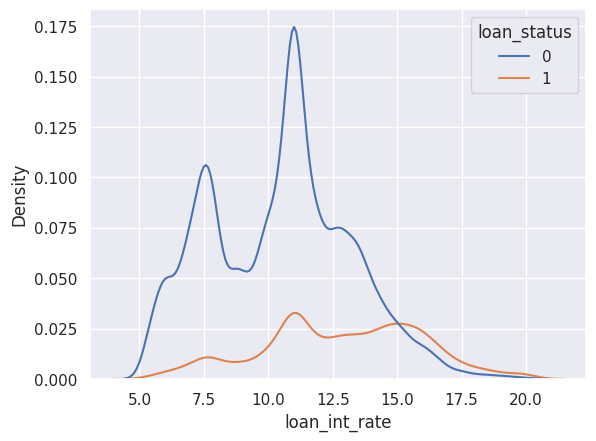

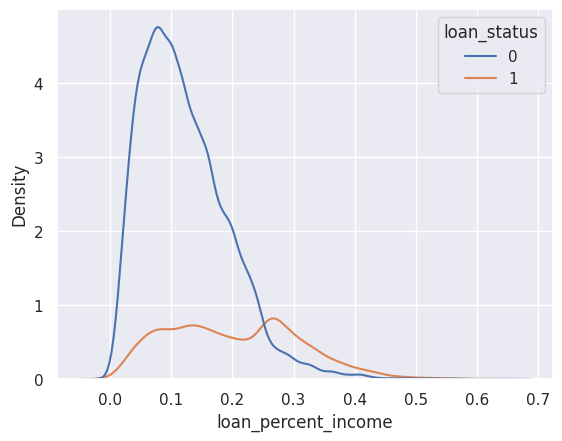

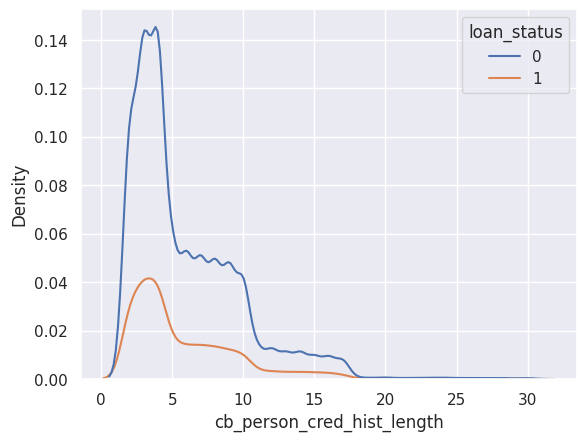

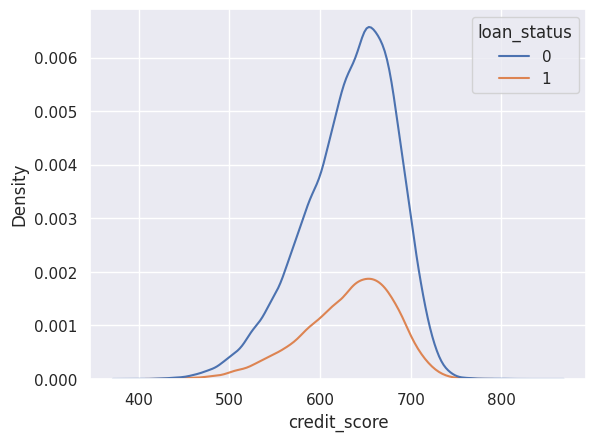

In [28]:
for feature in numerical_features:
        sns.kdeplot(data=df,x=feature,hue=target);
        plt.show();

Boxplots of each numerical feature by loan status

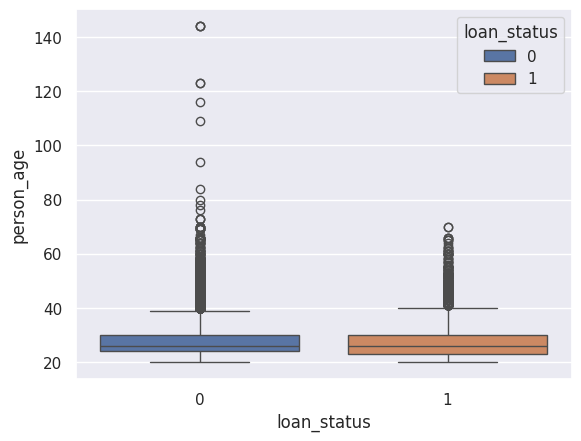

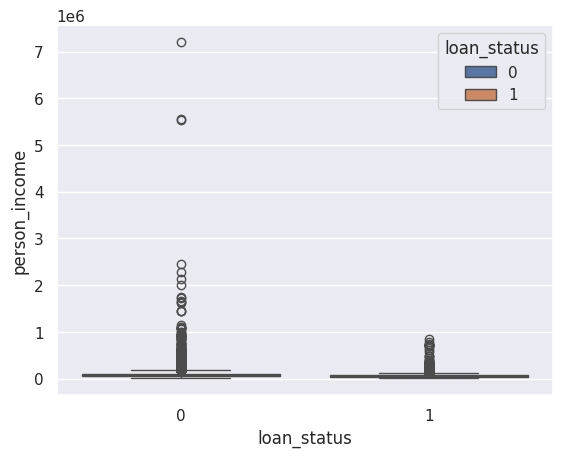

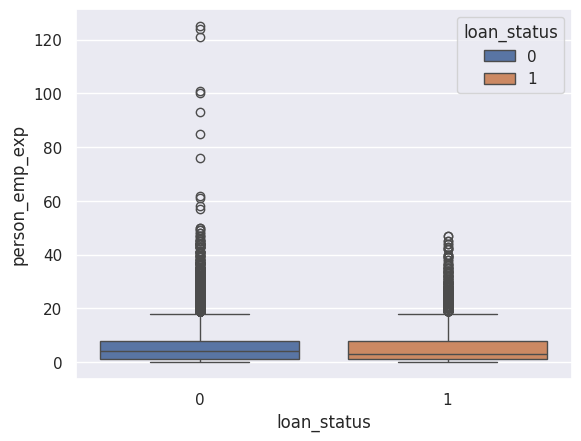

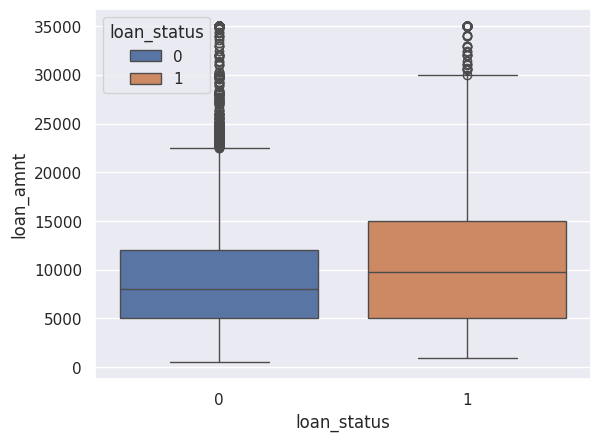

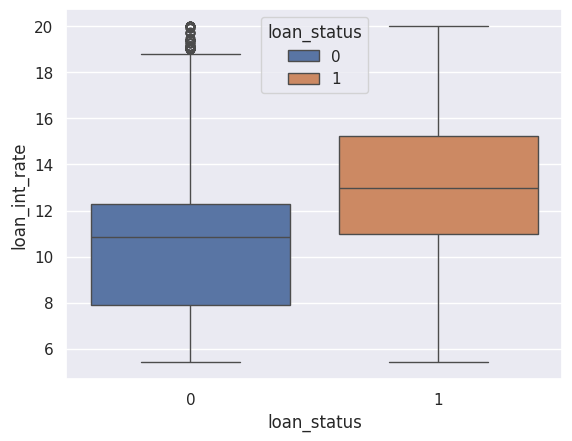

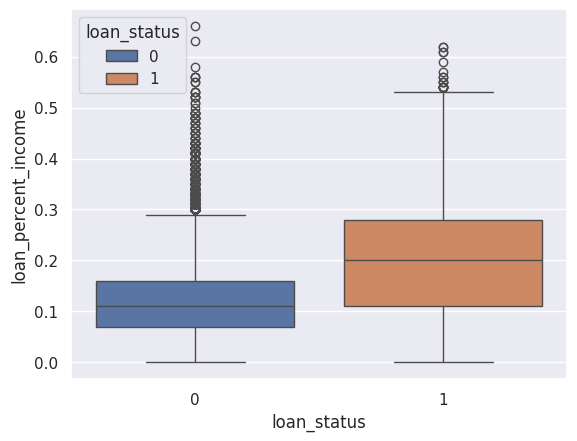

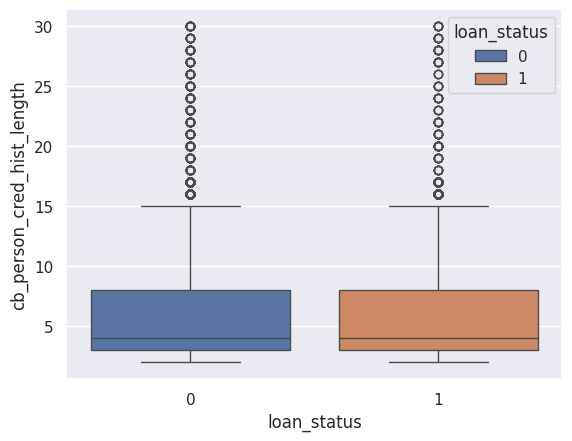

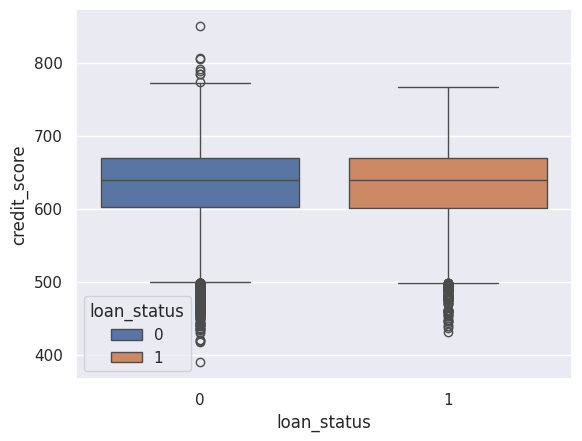

In [29]:
for feature in numerical_features:
    sns.boxplot(data=df,y=feature,x=target,hue=target);
    plt.show();

Cross tabulation of each categorical feature against the target variable, loan_status.

In [30]:
for feature in categorical_features:
    display(pd.crosstab(df[feature],df[target]))

loan_status        0     1
person_gender             
female         15674  4485
male           19326  5515

loan_status           0     1
person_education             
Associate          9378  2650
Bachelor          10381  3018
Doctorate           479   142
High School        9301  2671
Master             5461  1519

loan_status                0     1
person_home_ownership             
MORTGAGE               16345  2144
OTHER                     78    39
OWN                     2729   222
RENT                   15848  7595

loan_status           0     1
loan_intent                  
DEBTCONSOLIDATION  4982  2163
EDUCATION          7601  1552
HOMEIMPROVEMENT    3525  1258
MEDICAL            6170  2378
PERSONAL           6031  1521
VENTURE            6691  1128

loan_status                         0      1
previous_loan_defaults_on_file              
No                              12142  10000
Yes                             22858      0

#### Categorical Features

Plot of each categorical features grouped by loan status

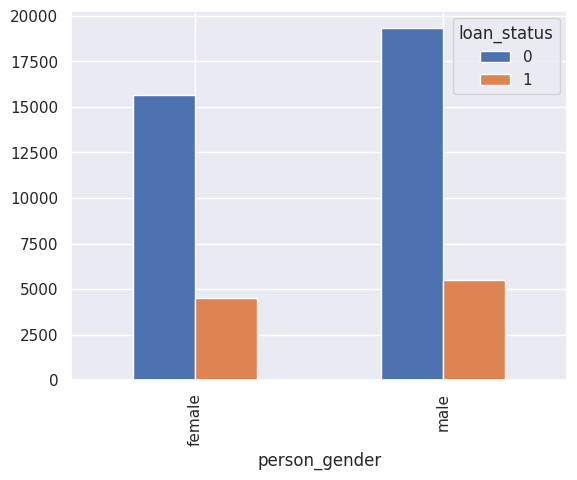

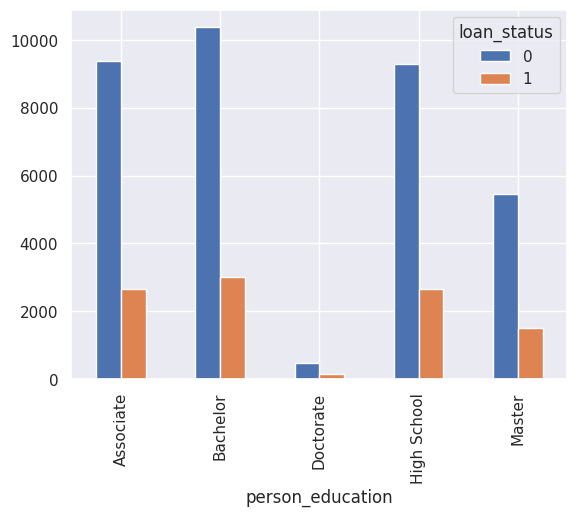

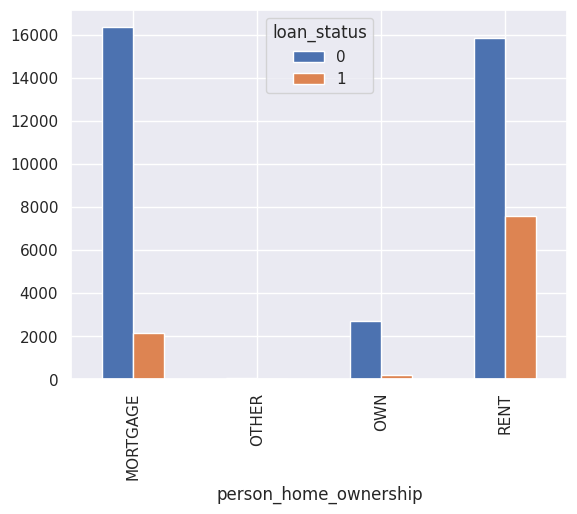

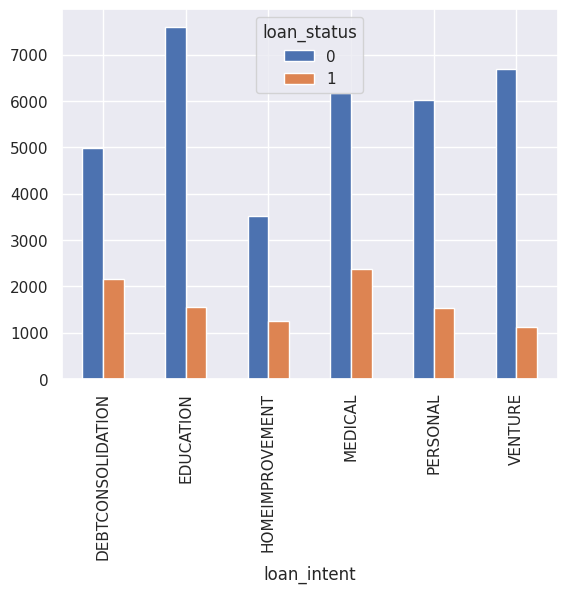

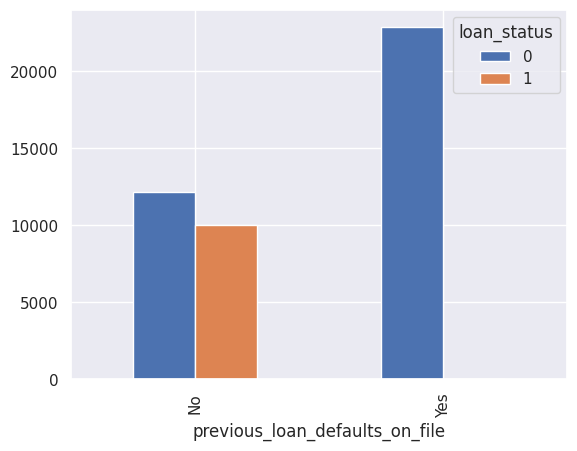

In [28]:
for feature in categorical_features:
    pd.crosstab(df[feature],df[target]).plot.bar()
    plt.show();

### Multivariate Analysis

Analysis of multiple variables

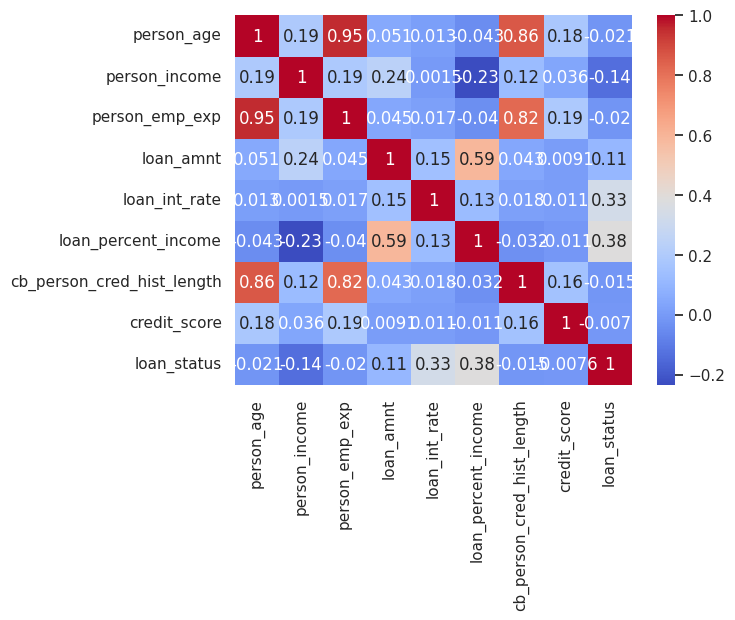

In [29]:
# correlation matrix
corr= df.corr(numeric_only=True)

# plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm');
plt.show();

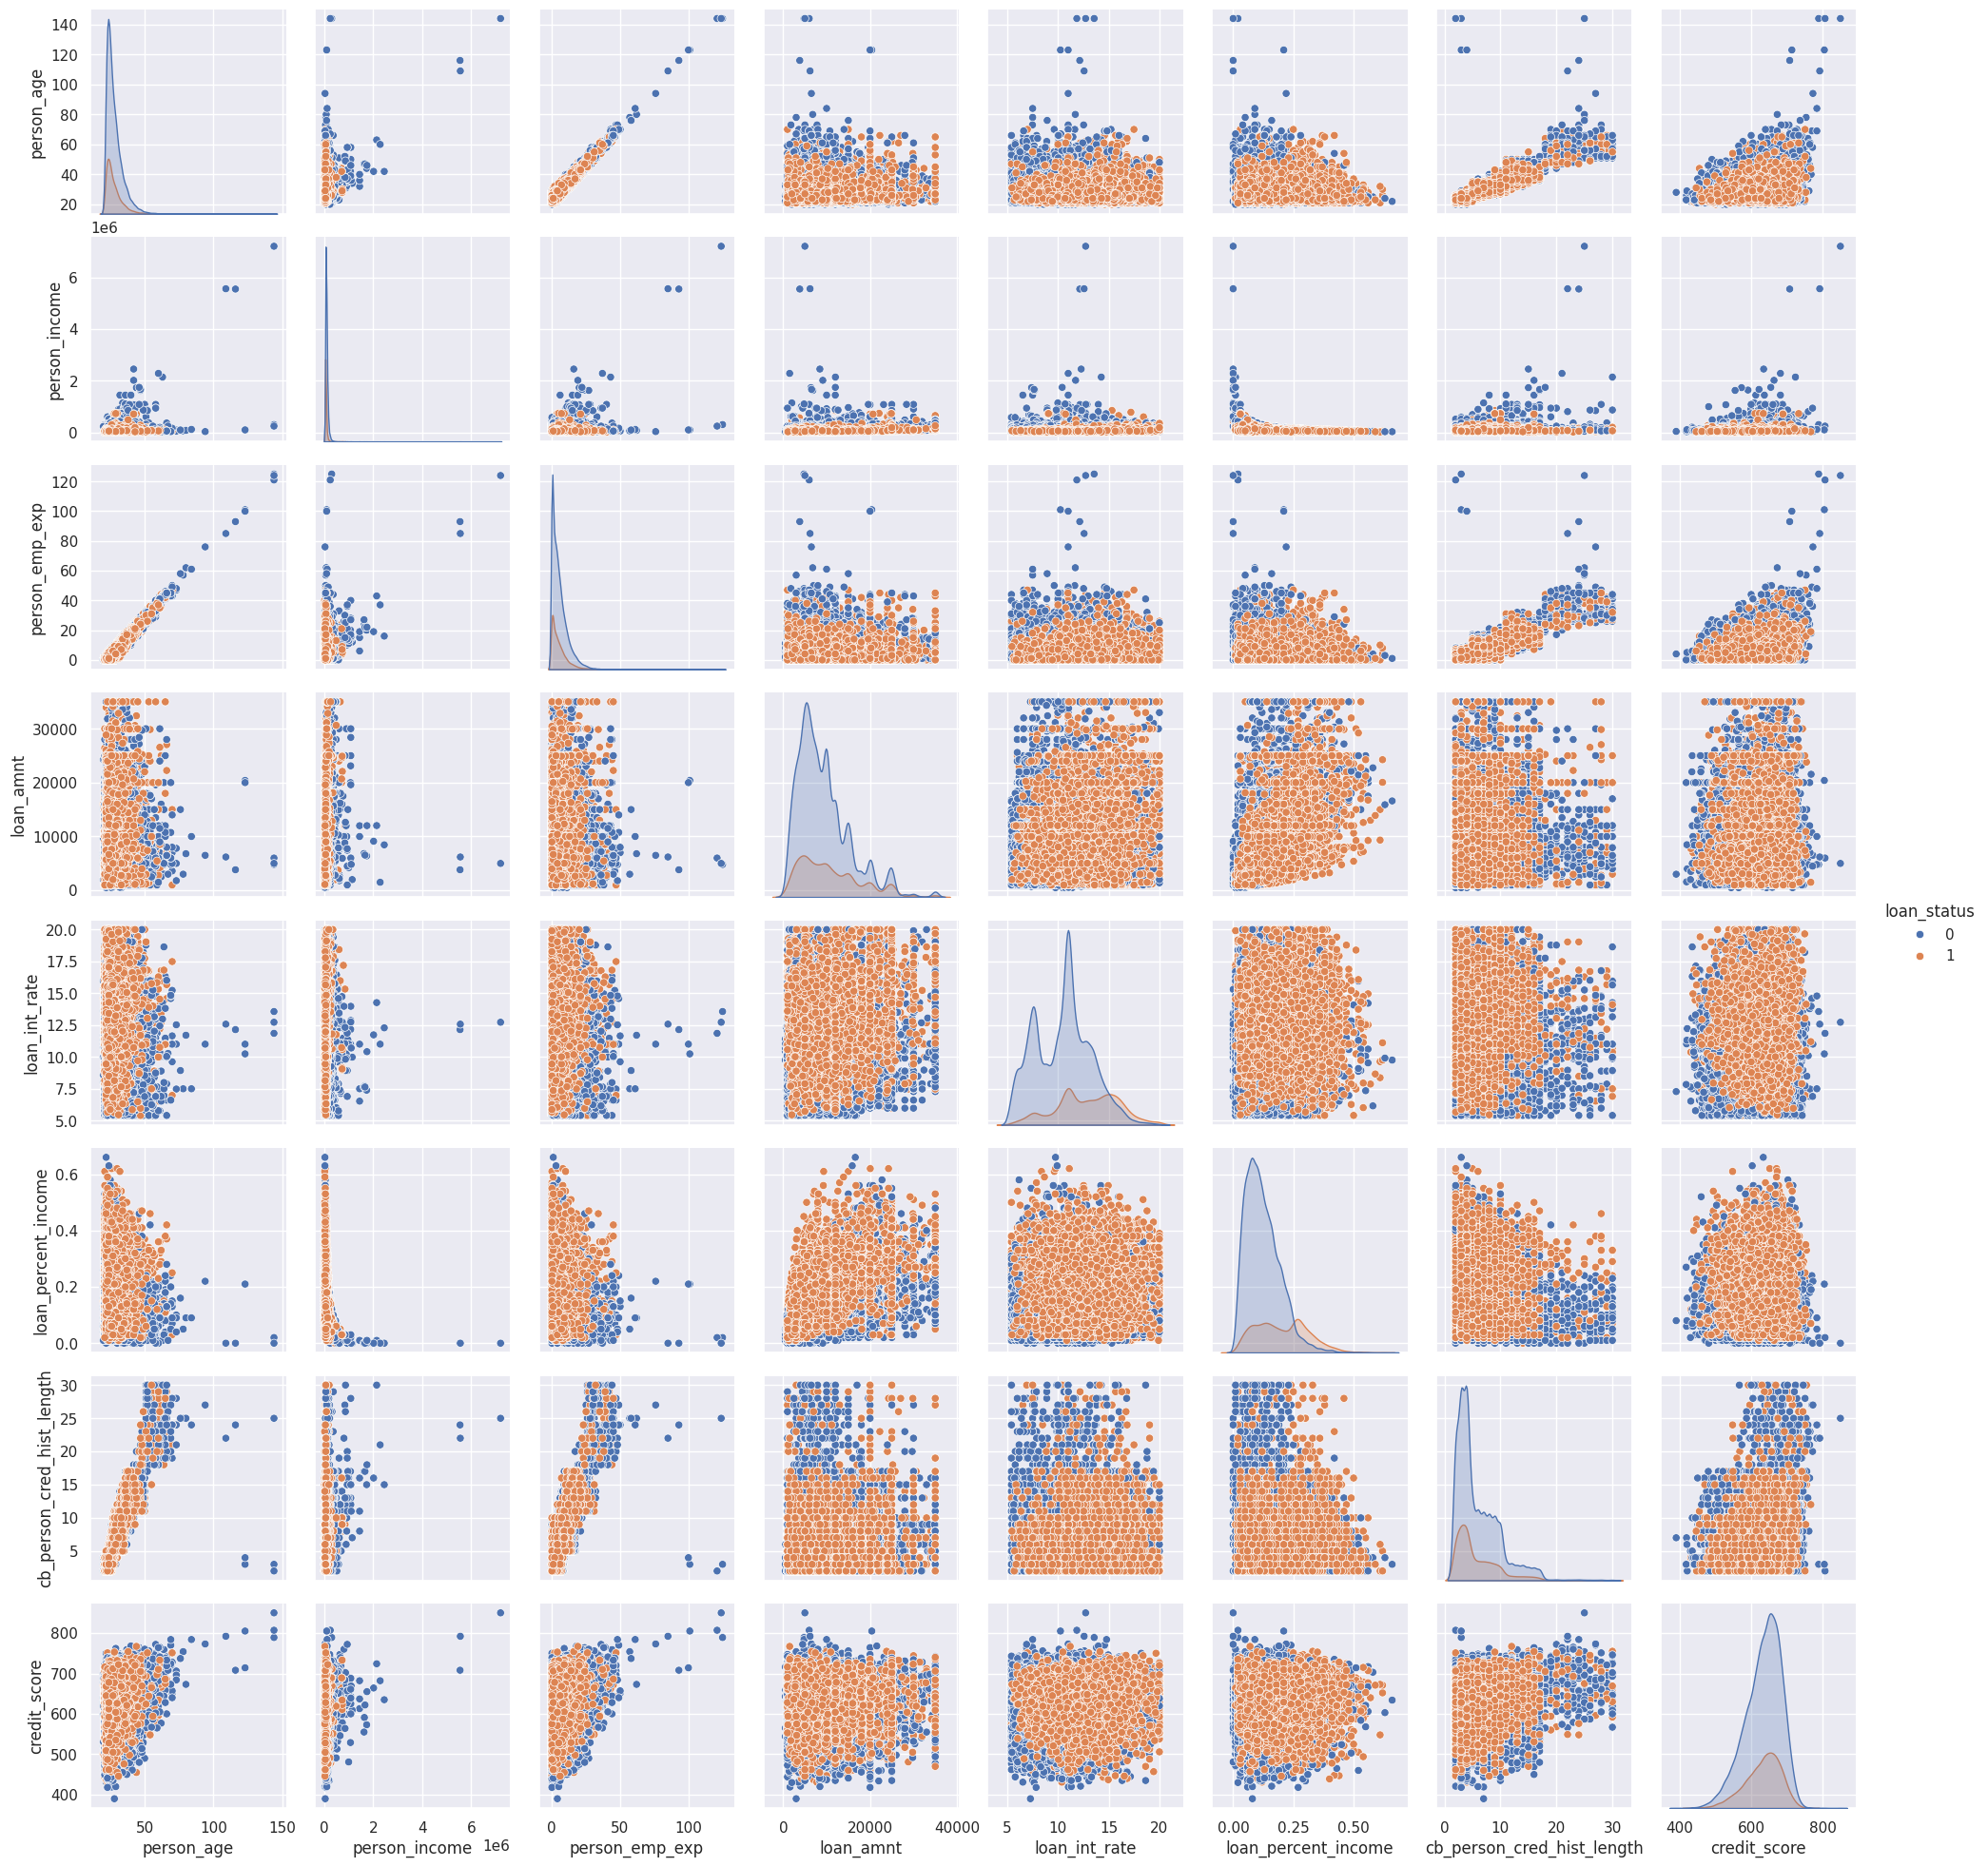

In [30]:
# Pairplot
sns.pairplot(data=df,hue=target);
plt.show();

## Feature Engineering

In [31]:
# import libraries

#
try:
  import sklearn
except ImportError:
  !pip install sklearn
  import sklearn

print(f'Sklearn version: {sklearn.__version__}')

# preprocessing
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder, OneHotEncoder

# scaling
from sklearn.preprocessing import StandardScaler

Sklearn version: 1.6.0


### Handling Outliers

Filtering variables for person_age and person_emp_exp.

For person_age, only include ages 90 and below.

In [32]:
df = df.loc[df['person_age']<=90]
df.shape

(44992, 14)

For person_emp_exp, only include years of employment experience less than or equal to 60 years

In [33]:
df = df.loc[df['person_emp_exp']<=60]
df.shape

(44990, 14)

### Feature Encoding

Transforming categorical features to numerical

Binarize 'person_gender' where '0' represents a 'female'.

In [34]:
# create a copy of the data
df_copy = df.copy().reset_index()

In [35]:
# binarize the person_gender feature
lb = LabelBinarizer()
df['person_gender'] = lb.fit_transform(df['person_gender'])
df.head()

person_age  person_gender person_education  person_income  person_emp_exp  \
0        22.0              0           Master        71948.0               0   
1        21.0              0      High School        12282.0               0   
2        25.0              0      High School        12438.0               3   
3        23.0              0         Bachelor        79753.0               0   
4        24.0              1           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

Ordinal encoding for 'person_education'. The levels of education from lowest to highest is as follows: high school, associate, bachelor, master, doctorate

In [36]:
# unique values of person_education
np.unique(df.person_education)

array(['Associate', 'Bachelor', 'Doctorate', 'High School', 'Master'],
      dtype=object)

In [37]:
# ordinal encoding for 'person_education'
oe = OrdinalEncoder(categories=[['High School','Associate','Bachelor','Master','Doctorate']])
df['person_education'] = oe.fit_transform(df[['person_education']])
df.head()

person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0               3.0        71948.0               0   
1        21.0              0               0.0        12282.0               0   
2        25.0              0               0.0        12438.0               3   
3        23.0              0               2.0        79753.0               0   
4        24.0              1               3.0        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [38]:
# unique values of person_home_ownership
np.unique(df.person_home_ownership)

array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object)

One-hot encoding for 'person_home_ownership'.

In [39]:
# one hot-encoding of person_home_ownership, dropping 'OTHER'
ohe = OneHotEncoder(categories=[['OTHER', 'OWN', 'RENT', 'MORTGAGE']], drop='first', sparse_output=False)
ohe.fit(df[['person_home_ownership']])
encoded_home_ownership = ohe.transform(df[['person_home_ownership']])
encoded_home_ownership = pd.DataFrame(encoded_home_ownership, columns=ohe.get_feature_names_out())
new_features = ohe.get_feature_names_out().tolist()
df = pd.concat([df.drop('person_home_ownership', axis=1).reset_index(drop=True), encoded_home_ownership], axis=1)
df.head()

person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0               3.0        71948.0               0   
1        21.0              0               0.0        12282.0               0   
2        25.0              0               0.0        12438.0               3   
3        23.0              0               2.0        79753.0               0   
4        24.0              1               3.0        66135.0               1   

   loan_amnt loan_intent  loan_int_rate  loan_percent_income  \
0    35000.0    PERSONAL          16.02                 0.49   
1     1000.0   EDUCATION          11.14                 0.08   
2     5500.0     MEDICAL          12.87                 0.44   
3    35000.0     MEDICAL          15.23                 0.44   
4    35000.0     MEDICAL          14.27                 0.53   

   cb_person_cred_hist_length  credit_score previous_loan_defaults_on_file  \
0                         3.0           561                             No   
1                         2.0           504                            Yes   
2                         3.0           635                             No   
3                         2.0           675                             No   
4                         4.0           586                             No   

   loan_status  person_home_ownership_OWN  person_home_ownership_RENT  \
0            1                        0.0                         1.0   
1            0                        1.0                         0.0   
2            1                        0.0                         0.0   
3            1                        0.0                         1.0   
4            1                        0.0                         1.0   

   person_home_ownership_MORTGAGE  
0                             0.0  
1                             0.0  
2                             1.0  
3                             0.0  
4                             0.0

In [40]:
# unique features of loan_intent without dropping any features
np.unique(df.loan_intent)

array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
       'PERSONAL', 'VENTURE'], dtype=object)

In [41]:
# one-hot-encoding of loan_intent
ohe = OneHotEncoder(categories=[['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
       'PERSONAL', 'VENTURE']], sparse_output=False)
encoded_loan_intent = ohe.fit_transform(df[['loan_intent']])
encoded_loan_intent = pd.DataFrame(encoded_loan_intent, columns=ohe.get_feature_names_out())
new_features += ohe.get_feature_names_out().tolist()
df = pd.concat([df.drop('loan_intent',axis=1).reset_index(drop=True), encoded_loan_intent], axis=1)
df.head()

person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0               3.0        71948.0               0   
1        21.0              0               0.0        12282.0               0   
2        25.0              0               0.0        12438.0               3   
3        23.0              0               2.0        79753.0               0   
4        24.0              1               3.0        66135.0               1   

   loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0    35000.0          16.02                 0.49                         3.0   
1     1000.0          11.14                 0.08                         2.0   
2     5500.0          12.87                 0.44                         3.0   
3    35000.0          15.23                 0.44                         2.0   
4    35000.0          14.27                 0.53                         4.0   

   credit_score  ... loan_status  person_home_ownership_OWN  \
0           561  ...           1                        0.0   
1           504  ...           0                        1.0   
2           635  ...           1                        0.0   
3           675  ...           1                        0.0   
4           586  ...           1                        0.0   

   person_home_ownership_RENT  person_home_ownership_MORTGAGE  \
0                         1.0                             0.0   
1                         0.0                             0.0   
2                         0.0                             1.0   
3                         1.0                             0.0   
4                         1.0                             0.0   

   loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
0                            0.0                    0.0   
1                            0.0                    1.0   
2                            0.0                    0.0   
3                            0.0                    0.0   
4                            0.0                    0.0   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                          0.0                  0.0                   1.0   
1                          0.0                  0.0                   0.0   
2                          0.0                  1.0                   0.0   
3                          0.0                  1.0                   0.0   
4                          0.0                  1.0                   0.0   

   loan_intent_VENTURE  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 21 columns]

In [42]:
# binarize 'previous_loan_defaults_on_file'
lb = LabelBinarizer()
df['previous_loan_defaults_on_file'] = lb.fit_transform(df['previous_loan_defaults_on_file'])
df.head()

person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0               3.0        71948.0               0   
1        21.0              0               0.0        12282.0               0   
2        25.0              0               0.0        12438.0               3   
3        23.0              0               2.0        79753.0               0   
4        24.0              1               3.0        66135.0               1   

   loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0    35000.0          16.02                 0.49                         3.0   
1     1000.0          11.14                 0.08                         2.0   
2     5500.0          12.87                 0.44                         3.0   
3    35000.0          15.23                 0.44                         2.0   
4    35000.0          14.27                 0.53                         4.0   

   credit_score  ...  loan_status  person_home_ownership_OWN  \
0           561  ...            1                        0.0   
1           504  ...            0                        1.0   
2           635  ...            1                        0.0   
3           675  ...            1                        0.0   
4           586  ...            1                        0.0   

   person_home_ownership_RENT  person_home_ownership_MORTGAGE  \
0                         1.0                             0.0   
1                         0.0                             0.0   
2                         0.0                             1.0   
3                         1.0                             0.0   
4                         1.0                             0.0   

   loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
0                            0.0                    0.0   
1                            0.0                    1.0   
2                            0.0                    0.0   
3                            0.0                    0.0   
4                            0.0                    0.0   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                          0.0                  0.0                   1.0   
1                          0.0                  0.0                   0.0   
2                          0.0                  1.0                   0.0   
3                          0.0                  1.0                   0.0   
4                          0.0                  1.0                   0.0   

   loan_intent_VENTURE  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 21 columns]

In [43]:
# inspect new feature names
print(df.columns)

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'person_home_ownership_MORTGAGE', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')


In [44]:
# number of features after encoding
print(f'The number of features for the encoded dataset is {df.drop(target, axis=1).shape[1]}')

The number of features for the encoded dataset is 20


In [45]:
# update categorical_features with the new features generated from encoding
categorical_features_new = categorical_features.copy()
categorical_features_new += new_features
renamed_features = ['person_home_ownership','loan_intent']
for feature in renamed_features:
    categorical_features_new.remove(feature)

In [46]:
# encoded feature names
feature_names_enc = df.drop(target, axis=1).columns.tolist()

### Feature Scaling

Standardizing numerical features

In [47]:
# standardizing the numerical features
std_scaler = StandardScaler()
df[numerical_features] = std_scaler.fit_transform(df[numerical_features])
df.head()

person_age  person_gender  person_education  person_income  person_emp_exp  \
0   -0.975222              0               3.0      -0.125718       -0.912694   
1   -1.144987              0               0.0      -1.067968       -0.912694   
2   -0.465927              0               0.0      -1.065505       -0.404745   
3   -0.805457              0               2.0      -0.002461       -0.912694   
4   -0.635692              1               3.0      -0.217517       -0.743378   

   loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0   4.024870       1.682942             4.016448                   -0.739616   
1  -1.359211       0.044810            -0.684999                   -0.997749   
2  -0.646612       0.625541             3.443101                   -0.739616   
3   4.024870       1.417752             3.443101                   -0.997749   
4   4.024870       1.095497             4.475125                   -0.481484   

   credit_score  ...  loan_status  person_home_ownership_OWN  \
0     -1.420381  ...            1                        0.0   
1     -2.551473  ...            0                        1.0   
2      0.048055  ...            1                        0.0   
3      0.841804  ...            1                        0.0   
4     -0.924287  ...            1                        0.0   

   person_home_ownership_RENT  person_home_ownership_MORTGAGE  \
0                         1.0                             0.0   
1                         0.0                             0.0   
2                         0.0                             1.0   
3                         1.0                             0.0   
4                         1.0                             0.0   

   loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
0                            0.0                    0.0   
1                            0.0                    1.0   
2                            0.0                    0.0   
3                            0.0                    0.0   
4                            0.0                    0.0   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                          0.0                  0.0                   1.0   
1                          0.0                  0.0                   0.0   
2                          0.0                  1.0                   0.0   
3                          0.0                  1.0                   0.0   
4                          0.0                  1.0                   0.0   

   loan_intent_VENTURE  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 21 columns]

# Model Fitting

In [48]:
# import libraries

# model selection
from sklearn.model_selection import train_test_split, StratifiedKFold
# feature selection
from sklearn.feature_selection import RFECV
# dummy
from sklearn.dummy import DummyClassifier
# logistic regression
from sklearn.linear_model import LogisticRegression
# ensemble models
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
# trees
from sklearn.tree import DecisionTreeClassifier
# model selection
from sklearn.model_selection import GridSearchCV
# metrics
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
# inspection
from sklearn.inspection import permutation_importance

## Data Splitting

In [49]:
# store data to X and y variables
X = df.drop(target, axis=1)
y = df[target].values

In [50]:
# split to 70% train, 15% validation, and 15% test data. Split is stratified by y. Use a random_state of 1
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1, stratify=y)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, train_size=0.5, random_state=1, stratify=y_test)

In [51]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((31492, 20), (31492,), (6749, 20), (6749,))

## Baseline Classifier

In [52]:
# create a dummy classifier with random_state=1 and strategy = 'uniform'
clf_d = DummyClassifier(random_state=1, strategy='uniform')
clf_d.fit(X_train, y_train)

DummyClassifier(random_state=1, strategy='uniform')

In [53]:
# predict with the test data
y_pred_dummy = clf_d.predict(X_test)

In [54]:
# score
print(classification_report(y_test,y_pred_dummy))

# precision
print(f'{precision_score(y_test,y_pred_dummy):.2f}')

              precision    recall  f1-score   support

           0       0.77      0.50      0.60      5249
           1       0.22      0.48      0.30      1500

    accuracy                           0.49      6749
   macro avg       0.49      0.49      0.45      6749
weighted avg       0.65      0.49      0.54      6749

0.22


## Logistic Regression

In [55]:
# create a LogisticRegression model
clf_logistic = LogisticRegression(penalty='l2', tol=1e-4, class_weight='balanced', n_jobs=-1, max_iter=1000)

### Feature Selection

In [56]:
# feature selection object
rfe = RFECV(estimator=clf_logistic,cv=5,scoring='precision',n_jobs=-1)

In [57]:
# fit
rfe.fit(X_train,y_train)

# number of selected features
print(f'Number of selected features: {rfe.n_features_}')

Number of selected features: 16


In [58]:
# index of selected features
idx = rfe.support_

In [59]:
# selected features
display(X_train.columns[idx].to_list())

['person_age',
 'person_income',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'credit_score',
 'previous_loan_defaults_on_file',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'person_home_ownership_MORTGAGE',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE']

In [60]:
# transform train and test data with the selected features
X_train_rfe = X_train[X_train.columns[idx]]
X_test_rfe = X_test[X_test.columns[idx]]

### Fitting

In [61]:
# tuning parameters
param_grid = {
    'C':[1,10,100],
    'solver':['lbfgs','liblinear','sag','saga']
}

Cross-validation of LogisticRegression

In [62]:
# cross-validation
gs = GridSearchCV(estimator=clf_logistic, param_grid=param_grid, scoring='precision', n_jobs=-1, cv=5)
gs.fit(X_train_rfe,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'C': [1, 10, 100],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='precision')

In [63]:
# best estimator
gs.best_estimator_

LogisticRegression(C=10, class_weight='balanced', max_iter=1000, n_jobs=-1,
                   solver='sag')

In [64]:
# best parameters
gs.best_params_

{'C': 10, 'solver': 'sag'}

In [65]:
# predict with the best estimator
clf_logistic=gs.best_estimator_
y_pred_logistic = clf_logistic.predict(X_test_rfe)

In [66]:
# score
print(classification_report(y_test,y_pred_logistic))

# precision
print(f'{precision_score(y_test,y_pred_logistic):.2f}')

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      5249
           1       0.61      0.91      0.74      1500

    accuracy                           0.85      6749
   macro avg       0.79      0.88      0.82      6749
weighted avg       0.89      0.85      0.86      6749

0.61


## Random Forest

In [67]:
# create a RandomForestClassifier object
clf_rf = RandomForestClassifier(random_state=1, bootstrap=True, oob_score=precision_score, class_weight='balanced')

### Feature Selection

In [68]:
# feature selection object
rfe = RFECV(estimator=clf_rf,cv=5,scoring='precision',n_jobs=-1)

In [69]:
# fit
rfe.fit(X_train,y_train)

# number of selected features
print(f'Number of selected features: {rfe.n_features_}')

Number of selected features: 18


In [70]:
# index of selected features
idx = rfe.support_

In [71]:
# selected features
display(X_train.columns[idx].to_list())

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'person_home_ownership_MORTGAGE',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_VENTURE']

In [72]:
# transform train and test data with the selected features
X_train_rfe = X_train[X_train.columns[idx]]
X_test_rfe = X_test[X_test.columns[idx]]

### Fitting

##### Cross-validation of RF model

In [73]:
# tuning parameters
param_grid = {
    'n_estimators' : [100,300,500],
    'max_depth': [None, 6, 9],
    'max_features' : ['sqrt','log2',None],
    'ccp_alpha': [0,0.01,0.05],
}

In [74]:
# cross-validation
gs = GridSearchCV(clf_rf, param_grid, n_jobs=-1, cv=5, scoring='precision')
gs.fit(X_train_rfe,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              oob_score=<function precision_score at 0x7da14d57ede0>,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.01, 0.05],
                         'max_depth': [None, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 300, 500]},
             scoring='precision')

In [75]:
# best estimator
gs.best_estimator_

RandomForestClassifier(ccp_alpha=0, class_weight='balanced', n_estimators=300,
                       oob_score=<function precision_score at 0x7da14d57ede0>,
                       random_state=1)

In [76]:
# best parameters
gs.best_params_

{'ccp_alpha': 0,
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [77]:
# fit a RandomForestClassifier model with the best estimators obtained from the GridSearchCV
clf_rf = gs.best_estimator_
y_pred_rf_tuned = clf_rf.predict(X_test_rfe)

In [78]:
# score of the RandomForestClassifier model with the tuned hyper-parameters
print(classification_report(y_test,y_pred_rf_tuned))

# precision score
print(f'{precision_score(y_test,y_pred_rf_tuned):.2f}')

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5249
           1       0.89      0.76      0.82      1500

    accuracy                           0.93      6749
   macro avg       0.91      0.87      0.89      6749
weighted avg       0.92      0.93      0.92      6749

0.89


## GradientBoosting

For the Gradient boosting model, we will use HistGradientBoostingClassifier since it is suggested for datasets with more than 10,000 samples for ease in computation.

In [79]:
# convert the data type of the categorical features to category
X_train[categorical_features_new]=X_train[categorical_features_new].astype('category')

In [80]:
# create a HistGradientBoostingClassifier
clf_hgb = HistGradientBoostingClassifier(random_state=1, early_stopping=True, validation_fraction=0.1, tol=1e-4,scoring='loss', categorical_features='from_dtype')

### Feature Selection

In [81]:
# define a class with a fit method
class perm_importance(HistGradientBoostingClassifier):
    def fit(self, X,y):
        X_train, X_validation, y_train, y_validation = train_test_split(
            X, y, test_size=0.2, random_state=42, shuffle=True
        )
        super().fit(X_train,y_train)

        self.perm_feature_importances_ = permutation_importance(
            self, X_validation, y_validation,
            n_repeats=5, random_state=42,
        )['importances_mean']

        return super().fit(X,y)

In [82]:
# define estimator
estimator = perm_importance(random_state=1, early_stopping=True, validation_fraction=0.1, tol=1e-4,scoring='loss', categorical_features='from_dtype')

In [83]:
# feature selection object
rfe = RFECV(estimator=estimator,cv=5,scoring='precision',n_jobs=-1, importance_getter='perm_feature_importances_')

In [84]:
# fit
rfe.fit(X_train,y_train)

# number of selected features
print(f'Number of selected features: {rfe.n_features_}')

Number of selected features: 15


In [85]:
# index of selected features
idx_gb = rfe.support_

In [86]:
# selected features
display(X_train.columns[idx_gb].to_list())

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_int_rate',
 'loan_percent_income',
 'credit_score',
 'previous_loan_defaults_on_file',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'person_home_ownership_MORTGAGE',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_VENTURE']

In [87]:
# transform train and test data with the selected features
X_train_rfe = X_train[X_train.columns[idx_gb]]
X_test_rfe = X_test[X_test.columns[idx_gb]]

### Fitting

Cross-validation of HistGradientBoostingClassifer

In [88]:
# tuning parameters
parameter_grid ={
    'max_iter':[100,200,300],
    'learning_rate': [0.05,0.1,0.15],
    'l2_regularization':[0,0.001,0.01],
    'max_depth':[None,3,6,9],
    'class_weight':[None,'balanced'],
    'max_features':[1.0,np.round((np.sqrt(X_train_rfe.shape[1])/np.sqrt(X_train_rfe.shape[1])),1)],
}

In [89]:
# cross-validation
gs = GridSearchCV(estimator=clf_hgb,param_grid=parameter_grid,n_jobs=-1,cv=5, scoring='precision')
gs.fit(X_train_rfe,y_train)

GridSearchCV(cv=5,
             estimator=HistGradientBoostingClassifier(early_stopping=True,
                                                      random_state=1,
                                                      tol=0.0001),
             n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'l2_regularization': [0, 0.001, 0.01],
                         'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [None, 3, 6, 9],
                         'max_features': [1.0, 1.0],
                         'max_iter': [100, 200, 300]},
             scoring='precision')

In [90]:
# best estimator
gs.best_estimator_

HistGradientBoostingClassifier(early_stopping=True, l2_regularization=0.001,
                               learning_rate=0.05, max_depth=6, max_iter=200,
                               random_state=1, tol=0.0001)

In [91]:
# best parameters
gs.best_params_

{'class_weight': None,
 'l2_regularization': 0.001,
 'learning_rate': 0.05,
 'max_depth': 6,
 'max_features': 1.0,
 'max_iter': 200}

In [92]:
# fit a HistGradientBoostingClassifier with the best estimators obtained from the GridSearchCV
clf_hgb = gs.best_estimator_

In [93]:
# prediction using the best estimator
y_pred_hgb = clf_hgb.predict(X_test)

In [94]:
# score
print(classification_report(y_pred_hgb, y_test))

# precision
print(precision_score(y_pred_hgb, y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      5434
           1       0.78      0.89      0.83      1315

    accuracy                           0.93      6749
   macro avg       0.87      0.91      0.89      6749
weighted avg       0.93      0.93      0.93      6749

0.7766666666666666


Plot of errors vs number of iterations for the best HistGradientBoostingClassifier model

In [95]:
# get number of iterations
n_iter=gs.best_estimator_.n_iter_

In [96]:
# boosting errors data frame
validation_errors = pd.DataFrame(
    {
        'Number of iterations':range(0, n_iter+1),
        'errors': gs.best_estimator_.validation_score_
    }

).set_index('Number of iterations')

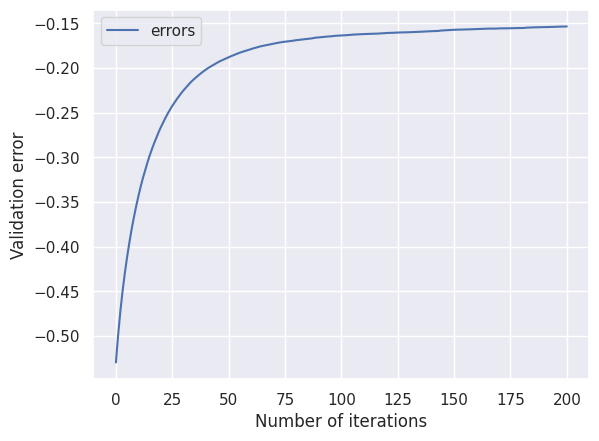

In [97]:
# plot of validation errors vs no. of iterations
ax = validation_errors.plot()
ax.set_ylabel('Validation error')
plt.show()

## AdaBoost

In [98]:
# create an AdaBoostClassifier model
clf_ab = AdaBoostClassifier(random_state=1, algorithm='SAMME',)

### Feature Selection

In [99]:
# feature selection object
rfe = RFECV(estimator=clf_ab,cv=5,scoring='precision',n_jobs=-1)

In [100]:
# fit
rfe.fit(X_train,y_train)

# number of selected features
print(f'Number of selected features: {rfe.n_features_}')

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 

Number of selected features: 10


In [101]:
# index of selected features
idx = rfe.support_

In [102]:
# selected features
display(X_train.columns[idx].to_list())

['person_income',
 'loan_int_rate',
 'loan_percent_income',
 'credit_score',
 'previous_loan_defaults_on_file',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'person_home_ownership_MORTGAGE',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_VENTURE']

In [103]:
# transform train and test data with the selected features
X_train_rfe = X_train[X_train.columns[idx]]
X_test_rfe = X_test[X_test.columns[idx]]

### Fitting

In [104]:
# tuning parameters
param_grid = {
    'estimator':[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=5)],
    'n_estimators' : [50,300,500],
    'learning_rate' : [0.1,0.3,0.5,1],
}

In [105]:
# cross validation with GridSearchCV
gs = GridSearchCV(estimator=clf_ab, param_grid=param_grid, n_jobs=-1, cv=5, scoring='precision')
gs.fit(X_train_rfe, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME', random_state=1),
             n_jobs=-1,
             param_grid={'estimator': [DecisionTreeClassifier(max_depth=1),
                                       DecisionTreeClassifier(max_depth=3),
                                       DecisionTreeClassifier(max_depth=5)],
                         'learning_rate': [0.1, 0.3, 0.5, 1],
                         'n_estimators': [50, 300, 500]},
             scoring='precision')

In [106]:
# best estimator
gs.best_estimator_

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.3, n_estimators=500, random_state=1)

In [107]:
# best parameters
gs.best_params_

{'estimator': DecisionTreeClassifier(max_depth=5),
 'learning_rate': 0.3,
 'n_estimators': 500}

In [108]:
# fit a AdaBoostClassifier with the best estimators obtained from the GridSearchCV
clf_ab = gs.best_estimator_
# predict using the best estimator
y_pred_ab = clf_ab.predict(X_test_rfe)

In [109]:
# score
print(classification_report(y_pred_ab, y_test))

# precision
print(precision_score(y_pred_ab, y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5400
           1       0.78      0.86      0.82      1349

    accuracy                           0.92      6749
   macro avg       0.87      0.90      0.88      6749
weighted avg       0.93      0.92      0.92      6749

0.7766666666666666


Plot of the misclassification error vs number of trees for the AdaBoostClassifier

In [110]:
# number of estimators
n_estimators= len(gs.best_estimator_.estimators_)

In [111]:
# function to calculate the misclassification error
def misclassification_error(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

In [112]:
# boostin errors dataframe
boosting_errors = pd.DataFrame(
    {
        'Number of trees':range(1, n_estimators+1),
        'errors': [misclassification_error(y_test,y_pred) for y_pred in clf_ab.staged_predict(X_test_rfe)]
    }
).set_index('Number of trees');

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


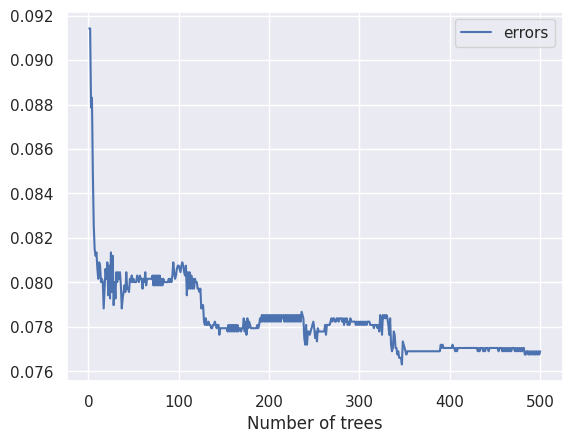

In [113]:
# plot of the boosting errors
ax = boosting_errors.plot()
plt.show()

## Feature Importances

In [114]:
# features
features = clf_logistic.feature_names_in_

Coefficients for logistic regression

In [115]:
# linear model coefficients
coefs = pd.Series(clf_logistic.coef_[0], index=features)

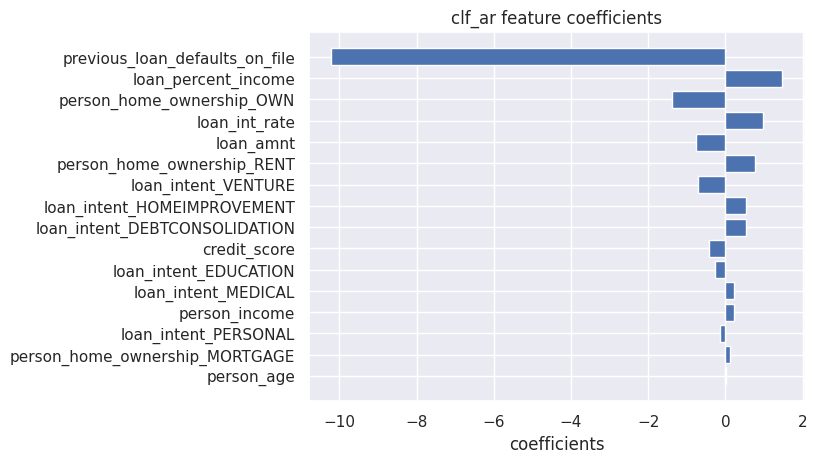

In [116]:
# sorting index
idx_sort = np.argsort(np.abs(coefs))

# plot
plt.barh(y=[coefs.keys().to_list()[i] for i in idx_sort],width=coefs.iloc[idx_sort]);
plt.title('clf_ar feature coefficients');
plt.xlabel('coefficients');
plt.show();

Feature Importances

In [117]:
classification_models = [clf_rf,clf_ab]
model_names = ['clf_rf','clf_ab']

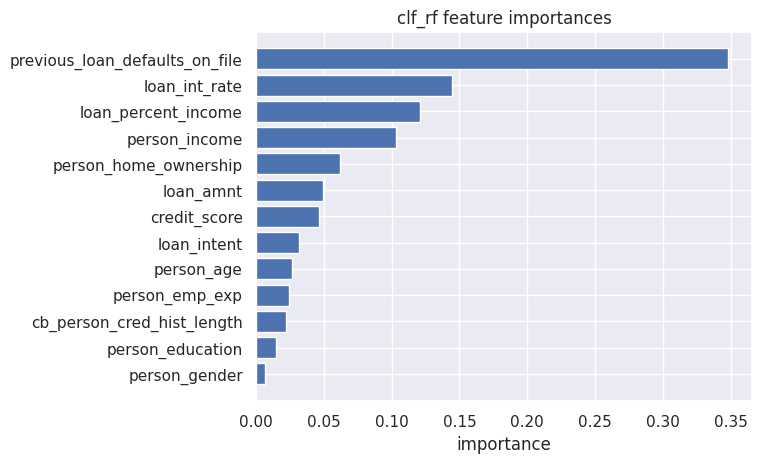

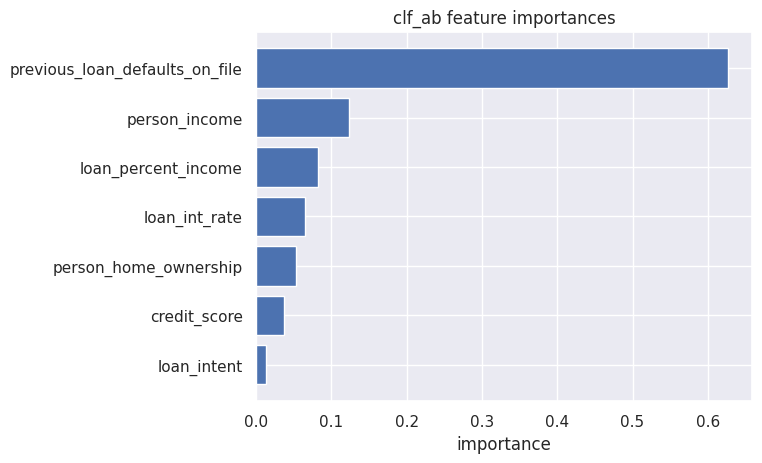

In [118]:
# feature importances
for model, model_name in zip(classification_models,model_names):
    imp = pd.Series(model.feature_importances_, index=model.feature_names_in_)
    # merge features
    features = model.feature_names_in_
    for feature in categorical_features:
        # boolean index to match each categorical feature in the new features
        idx = [(feature in i) for i in imp.keys().to_list()]
        # summed mean of importances
        imp_sum = imp[idx].sum()
        imp = imp[np.logical_not(idx)]
        if np.any([(feature in i) for i in features]):
            imp[feature] = imp_sum

    # sorting index
    idx_sort = np.argsort(imp)

    # plot
    plt.barh(y=[imp.keys().to_list()[i] for i in idx_sort],width=imp.iloc[idx_sort]);
    plt.title(f'{model_name} feature importances');
    plt.xlabel('importance');
    plt.show();

Permutation importances for HistGradientBoostingClassifier

In [119]:
# Permutation importance
result = permutation_importance(clf_hgb, X_test[X_test.columns[idx_gb]], y_test, n_repeats=5, n_jobs=-1, random_state=1)
hgb_importances = pd.Series(result.importances_mean, index=clf_hgb.feature_names_in_)
hgb_std = pd.Series(result.importances_std, index=clf_hgb.feature_names_in_)

In [120]:
features= clf_hgb.feature_names_in_

In [121]:
# sum the importances for the renamed features
for feature in categorical_features:
    idx = [(feature in i) for i in hgb_importances.keys().tolist()]

    importances_sum = hgb_importances[idx].sum()
    hgb_importances = hgb_importances[np.logical_not(idx)]
    hgb_importances[feature] = importances_sum
    if np.any([(feature in i) for i in features]):
        imp[feature] = imp_sum

    importances_std = np.sqrt((hgb_std[idx]**2).sum())
    hgb_std = hgb_std[np.logical_not(idx)]
    hgb_std[feature] = importances_std

In [122]:
# sorting index based on feature importance
idx_sort = np.argsort(hgb_importances)

Plot of feature importances for the HistGradientBoostingClassifier

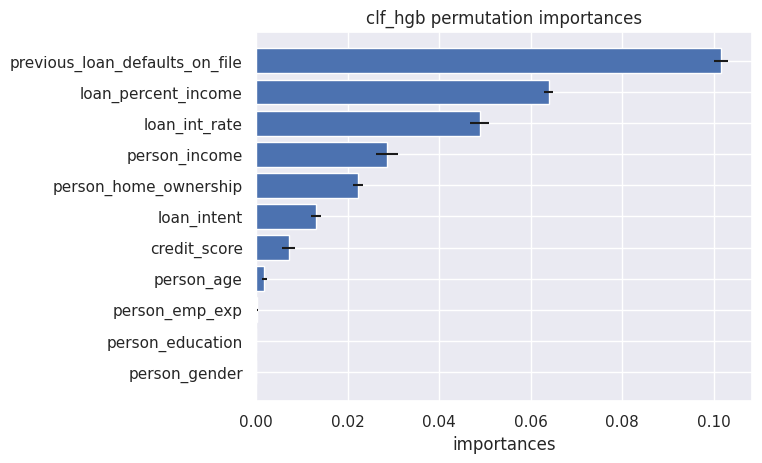

In [123]:
# plot of feature importances
fig, ax = plt.subplots()
ax.barh(y=[hgb_importances.keys().tolist()[i] for i in idx_sort], width=hgb_importances.iloc[idx_sort], xerr=hgb_std.iloc[idx_sort])
ax.set_xlabel('importances');
ax.set_title('clf_hgb permutation importances');
plt.show();

# Summary

Summary of models

In [124]:
models = ['DummyClassifier','LogisticRegression','RandomForestClassifier','HistGradientBoostingClassifier','AdaBoostClassifier']
y_preds = [y_pred_dummy,y_pred_logistic,y_pred_rf_tuned,y_pred_hgb,y_pred_ab]
accuracy_scores = [accuracy_score(y_test,y_pred) for y_pred in y_preds]
recall_scores = [recall_score(y_test,y_pred) for y_pred in y_preds]
precision_scores = [precision_score(y_test,y_pred) for y_pred in y_preds]
f1_scores = [f1_score(y_test,y_pred) for y_pred in y_preds]

In [125]:
for i, model in enumerate(models):
    summary_model={
        'Model':model,
        'Accuracy':accuracy_scores[i],
        'Recall':recall_scores[i],
        'Precision':precision_scores[i],
        'F1 score':f1_scores[i]
    }
    summary.append(summary_model)

In [126]:
display(pd.DataFrame(summary))

Model  Accuracy    Recall  Precision  F1 score
0                 DummyClassifier  0.494295  0.484667   0.215919  0.298747
1              LogisticRegression  0.853460  0.914667   0.614420  0.735066
2          RandomForestClassifier  0.926211  0.760667   0.891406  0.820863
3  HistGradientBoostingClassifier  0.928138  0.776667   0.885932  0.827709
4              AdaBoostClassifier  0.923100  0.776667   0.863603  0.817831

# Training with Neural Network

In [231]:
# import libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

print(f'Torch version: {torch.__version__}')

Torch version: 2.5.1+cu121


In [232]:
# import ray tune for hyperparameter tuning
try:
  import ray
except ImportError:
  !pip install ray
  import ray

from ray import tune, train
from ray.train import Checkpoint
from ray.air import RunConfig
from ray.tune.schedulers import ASHAScheduler

print(f'Ray version: {ray.__version__}')

Ray version: 2.40.0


In [233]:
# import other helper libraries
import os
import joblib
import tempfile
try:
  import dill
except ImportError:
  !pip install dill

print(f'Joblib version: {joblib.__version__}')
print(f'Dill version: {dill.__version__}')

Joblib version: 1.4.2
Dill version: 0.3.9


## Data Loading as Tensors

In [234]:
# assign device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [235]:
# def load_data function that will load the datasets as tensors
def load_data(X_train, X_validation, X_test, y_train, y_validation, y_test, device):

  # convert dataframes and numpy arrays to tensors
  X_train = torch.tensor(X_train.values, dtype=torch.float32, device=device)
  X_validation = torch.tensor(X_validation.values, dtype=torch.float32, device=device)
  X_test = torch.tensor(X_test.values, dtype=torch.float32, device=device)
  y_train = torch.tensor(y_train, dtype=torch.float32, device=device)
  y_validation = torch.tensor(y_validation, dtype=torch.float32, device=device)
  y_test = torch.tensor(y_test, dtype=torch.float32, device=device)

  # create tensor datasets
  train_dataset = data.TensorDataset(X_train, y_train)
  validation_dataset = data.TensorDataset(X_validation, y_validation)
  test_dataset = data.TensorDataset(X_test, y_test)

  return train_dataset, validation_dataset, test_dataset


In [236]:
# load datasets
train_dataset, validation_dataset, test_dataset = load_data(X_train, X_validation, X_test, y_train, y_validation, y_test, device)

## Defining the Neural Network

In [237]:
# input size (features)
input_size = X_train.shape[-1]
print(input_size)

20


In [238]:
# categorical features
X_train.columns.to_list()

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'person_home_ownership_MORTGAGE',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE']

In [239]:
# define the neural network architecture

class ClassificationNet(nn.Module):
    def __init__(self, input_size = 20, l0=8, l1=16, l2=32, dropout_rate=0.2):
      super().__init__()

      # input branches for grouped features (One-hot-encoded)
      self.home_ownership_branch = nn.Sequential(
          nn.Linear(3, l0//4),
          nn.ReLU()
          )
      self.loan_intent_branch = nn.Sequential(
          nn.Linear(6, l0//4),
          nn.ReLU()
          )

      # other features
      self.other_features = nn.Sequential(
          nn.Linear(20-3-6, l0//2),
          nn.ReLU()
          )

      self.bn0 = nn.BatchNorm1d(2*(l0//4)+(l0//2), dtype=torch.float32) # first normalization layer
      self.dropout0 = nn.Dropout(p=dropout_rate) # first dropout layer

      self.fc1 = nn.Linear(l0, l1) # first fully connected layer
      self.bn1 = nn.BatchNorm1d(l1, dtype=torch.float32)
      self.dropout1 = nn.Dropout(p=dropout_rate)

      self.fc2 = nn.Linear(l1, l2) # second fully connected layer

      self.fc3 = nn.Linear(l2, 1) #final fully connected layer; 1 output corresponding to loan approval
      self.sigmoid = nn.Sigmoid() # layer converting the output to a probability

    def forward(self, x):
      # split features into groups
      home_ownership_inputs = x[:,11:14]
      loan_intent_inputs = x[:, 14:20]
      other_inputs = x[:,:11]

      # processing each group
      home_ownership_outputs = self.home_ownership_branch(home_ownership_inputs)
      loan_intent_outputs = self.loan_intent_branch(loan_intent_inputs)
      other_outputs = self.other_features(other_inputs)

      # concatenate ouputs
      x = self.bn0(torch.cat([home_ownership_outputs, loan_intent_outputs, other_outputs], dim=1))
      x = self.dropout0(x)

      x = self.bn1(F.relu(self.fc1(x))) # first fully connected layer
      x = self.dropout1(x)

      x = F.relu(self.fc2(x)) # second fully connected layer

      x = self.fc3(x) # output layer
      x = self.sigmoid(x) # conversion of output layer to a probability
      return x

## Train Function

In [240]:
# define a train function
def train_func(model, optimizer, train_loader, device, epoch):
  model.train()

  # initialize values
  running_loss = 0
  train_loss = 0
  precision = 0
  total_accuracy = 0
  batch_data_points = 0
  total_data_points = 0
  all_labels = []
  all_predictions = []

  # iterate through batches
  for batch_idx, data in enumerate(train_loader):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    # reset gradient to 0
    optimizer.zero_grad()

    # criterion
    criterion = nn.BCELoss()

    # forward
    prediction_probas = model(inputs).squeeze(1)
    predictions = torch.where(prediction_probas >= 0.5, 1., 0.) # convert the probability to class prediction

    # accumulate all labels and predictions
    all_predictions.extend(predictions.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

    # loss
    loss = criterion(prediction_probas, labels)

    # backward
    loss.backward()

    # optimize
    optimizer.step()

    # monitor running loss (for the mini-batch)
    running_loss += loss.item() * len(inputs)

    # monitor data points for the batch
    batch_data_points += len(inputs)

    # monitor total_data points
    total_data_points += len(inputs)

    # output statistics every quarter of total batches
    if (batch_idx+1) in [len(train_loader)//i for i in range(1,5)]:
      print(f'[{epoch+1}, {batch_idx+1}] loss: {running_loss/batch_data_points:.4f}')

      # reset monitoring values
      running_loss = 0
      batch_data_points = 0

    # monitor total train_loss
    train_loss += loss * len(inputs)

    # average loss
    average_loss = train_loss / total_data_points

  # precision
  precision = precision_score(all_labels,all_predictions)

  return precision

## Test Function

In [241]:
# define a test function
def test_func(model, test_loader, device):
  model.eval()

  # initialize values
  all_predictions = []
  all_labels = []
  precision = 0

  # iterate through batches
  for batch_idx, data in enumerate(test_loader):
    with torch.no_grad():
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)

      # predictions
      prediction_probas = model(inputs).squeeze(1)
      predictions = torch.where(prediction_probas >= 0.5, 1., 0.) # convert the probability to class prediction

      # accumulate labels and predictions
      all_predictions.extend(predictions.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())

  # precision
  precision = precision_score(all_labels, all_predictions)

  # classification report
  report = classification_report(all_labels, all_predictions, output_dict=True)

  return precision, report

## Train Loop

In [242]:
# define training loop
def train_loanapproval(config, train_dataset, validation_dataset, epoch_start=0, epoch_end=5):
  # device
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  # dataloaders
  train_loader = data.DataLoader(train_dataset, batch_size=config['batch_size'], num_workers=2)
  validation_loader = data.DataLoader(validation_dataset, batch_size=config['batch_size'], num_workers=2)

  # define model
  model = ClassificationNet(input_size=20, l0=config['l0'], l1=config['l1'], l2=config['l2'], dropout_rate=config['dropout_rate'])
  model.to(device)

  # define optimizer
  optimizer = torch.optim.Adam(params=model.parameters(), lr=config['lr'])

  # train loop
  for epoch in range(epoch_start, epoch_end):
    train_precision = train_func(model=model, optimizer=optimizer, train_loader=train_loader, device=device, epoch=epoch)
    # evaluation on validation set
    validation_precision,_ = test_func(model=model, test_loader=validation_loader, device=device)

    # create checkpoint
    with tempfile.TemporaryDirectory() as temp_checkpoint_dir:
      checkpoint = None

      # save current state_dict (checkpoint)
      torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
        }, os.path.join(temp_checkpoint_dir, 'checkpoint.pth'))

      # load checkpoint from saved file
      checkpoint = Checkpoint.from_directory(temp_checkpoint_dir)

      # report to ray tune the precision with the associated checkpoint after each epoch
      train.report({'precision':validation_precision}, checkpoint=checkpoint)

  print('Finished Training')

## Hyperparameter Tuning

In [243]:
# define tuner_func

def tuner_func(search_space, num_samples, epoch_end):
  tuner = tune.Tuner(
      trainable = tune.with_parameters(train_loanapproval, train_dataset=train_dataset, validation_dataset=validation_dataset, epoch_end=epoch_end),
      param_space = search_space,
      tune_config = tune.TuneConfig(num_samples=num_samples, mode='max', metric='precision')
  )

  # execute hyperparameter tuning
  results = tuner.fit()

  return results

In [244]:
# defining the search space
search_space = {
    'l0' : tune.choice([2**i for i in range(3,9)]),
    'l1' : tune.choice([2**i for i in range(3,9)]),
    'l2' : tune.choice([2**i for i in range(3,9)]),
    'batch_size': tune.choice([2**i for i in range(4,7)]),
    'lr' : tune.loguniform(1e-4,1e-2),
    'dropout_rate': tune.choice(np.arange(0.1,0.6,0.1))
}

# run tuner
results = tuner_func(search_space=search_space, num_samples=10, epoch_end=10)

2025-01-22 14:03:14,016	WARNING callback.py:136 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


+---------------------------------------------------------------------------+
| Configuration for experiment     train_loanapproval_2025-01-22_14-03-13   |
+---------------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator                    |
| Scheduler                        FIFOScheduler                            |
| Number of trials                 10                                       |
+---------------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_loanapproval_2025-01-22_14-03-13

Trial status: 10 PENDING
Current time: 2025-01-22 14:03:14. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+--------------------------------------------------------------------------------------------------------------+
| Trial name                       status       l0     l1     l2     batch_size            lr     dropout_rate |
+--------------

(train_loanapproval pid=111321) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00001_1_batch_size=64,dropout_rate=0.5000,l0=16,l1=8,l2=256,lr=0.0070_2025-01-22_14-03-14/checkpoint_000000)


(train_loanapproval pid=111321) [2, 123] loss: 0.2827 [repeated 8x across cluster]


(train_loanapproval pid=111321) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00001_1_batch_size=64,dropout_rate=0.5000,l0=16,l1=8,l2=256,lr=0.0070_2025-01-22_14-03-14/checkpoint_000001) [repeated 2x across cluster]


(train_loanapproval pid=111292) [2, 493] loss: 0.2435 [repeated 7x across cluster]

Trial status: 2 RUNNING | 8 PENDING
Current time: 2025-01-22 14:03:44. Total running time: 30s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 9f0be_00001 with precision=0.9087591240875912 and params={'l0': 16, 'l1': 8, 'l2': 256, 'batch_size': 64, 'lr': 0.007001753275244763, 'dropout_rate': 0.5}
+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status       l0     l1     l2     batch_size            lr     dropout_rate     iter     total time (s)     precision |
+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_9f0be_00000   RUNNING     256     64     32             64   0.00034257               0.5        1            11.50

(train_loanapproval pid=111321) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00001_1_batch_size=64,dropout_rate=0.5000,l0=16,l1=8,l2=256,lr=0.0070_2025-01-22_14-03-14/checkpoint_000002) [repeated 2x across cluster]


(train_loanapproval pid=111292) [4, 246] loss: 0.2320 [repeated 7x across cluster]


(train_loanapproval pid=111321) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00001_1_batch_size=64,dropout_rate=0.5000,l0=16,l1=8,l2=256,lr=0.0070_2025-01-22_14-03-14/checkpoint_000003) [repeated 2x across cluster]


(train_loanapproval pid=111321) [5, 246] loss: 0.2729 [repeated 5x across cluster]


(train_loanapproval pid=111321) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00001_1_batch_size=64,dropout_rate=0.5000,l0=16,l1=8,l2=256,lr=0.0070_2025-01-22_14-03-14/checkpoint_000004) [repeated 2x across cluster]


(train_loanapproval pid=111321) [6, 123] loss: 0.2691 [repeated 5x across cluster]


(train_loanapproval pid=111321) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00001_1_batch_size=64,dropout_rate=0.5000,l0=16,l1=8,l2=256,lr=0.0070_2025-01-22_14-03-14/checkpoint_000005) [repeated 2x across cluster]


(train_loanapproval pid=111321) [7, 123] loss: 0.2666 [repeated 8x across cluster]
Trial status: 2 RUNNING | 8 PENDING
Current time: 2025-01-22 14:04:14. Total running time: 1min 0s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 9f0be_00001 with precision=0.8746298124383021 and params={'l0': 16, 'l1': 8, 'l2': 256, 'batch_size': 64, 'lr': 0.007001753275244763, 'dropout_rate': 0.5}
+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status       l0     l1     l2     batch_size            lr     dropout_rate     iter     total time (s)     precision |
+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_9f0be_00000   RUNNING     256     64     32             64   0.00034257               0.5        5            44

(train_loanapproval pid=111292) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00000_0_batch_size=64,dropout_rate=0.5000,l0=256,l1=64,l2=32,lr=0.0003_2025-01-22_14-03-14/checkpoint_000005)


(train_loanapproval pid=111321) [7, 493] loss: 0.2648 [repeated 4x across cluster]


(train_loanapproval pid=111321) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00001_1_batch_size=64,dropout_rate=0.5000,l0=16,l1=8,l2=256,lr=0.0070_2025-01-22_14-03-14/checkpoint_000006)


(train_loanapproval pid=111321) [8, 493] loss: 0.2648 [repeated 8x across cluster]


(train_loanapproval pid=111321) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00001_1_batch_size=64,dropout_rate=0.5000,l0=16,l1=8,l2=256,lr=0.0070_2025-01-22_14-03-14/checkpoint_000007) [repeated 2x across cluster]


(train_loanapproval pid=111292) [8, 493] loss: 0.2101 [repeated 7x across cluster]


(train_loanapproval pid=111292) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00000_0_batch_size=64,dropout_rate=0.5000,l0=256,l1=64,l2=32,lr=0.0003_2025-01-22_14-03-14/checkpoint_000007)
(train_loanapproval pid=111321) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00001_1_batch_size=64,dropout_rate=0.5000,l0=16,l1=8,l2=256,lr=0.0070_2025-01-22_14-03-14/checkpoint_000008)


(train_loanapproval pid=111292) [9, 493] loss: 0.2063 [repeated 8x across cluster]


(train_loanapproval pid=111292) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00000_0_batch_size=64,dropout_rate=0.5000,l0=256,l1=64,l2=32,lr=0.0003_2025-01-22_14-03-14/checkpoint_000008)
(train_loanapproval pid=111321) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00001_1_batch_size=64,dropout_rate=0.5000,l0=16,l1=8,l2=256,lr=0.0070_2025-01-22_14-03-14/checkpoint_000009)


(train_loanapproval pid=111321) Finished Training

Trial train_loanapproval_9f0be_00001 completed after 10 iterations at 2025-01-22 14:04:40. Total running time: 1min 26s
+-------------------------------------------------------------------+
| Trial train_loanapproval_9f0be_00001 result                       |
+-------------------------------------------------------------------+
| checkpoint_dir_name                             checkpoint_000009 |
| time_this_iter_s                                          6.13625 |
| time_total_s                                             76.55521 |
| training_iteration                                             10 |
| precision                                                 0.92408 |
+-------------------------------------------------------------------+

Trial status: 1 RUNNING | 1 TERMINATED | 8 PENDING
Current time: 2025-01-22 14:04:44. Total running time: 1min 30s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 9f0be_00001 with p

(train_loanapproval pid=111292) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00000_0_batch_size=64,dropout_rate=0.5000,l0=256,l1=64,l2=32,lr=0.0003_2025-01-22_14-03-14/checkpoint_000009)



Trial train_loanapproval_9f0be_00002 started with configuration:
+---------------------------------------------------------+
| Trial train_loanapproval_9f0be_00002 config             |
+---------------------------------------------------------+
| batch_size                                           32 |
| dropout_rate                                        0.2 |
| l0                                                    8 |
| l1                                                    8 |
| l2                                                   64 |
| lr                                              0.00136 |
+---------------------------------------------------------+
(train_loanapproval pid=112167) [1, 246] loss: 0.4200 [repeated 2x across cluster]

Trial train_loanapproval_9f0be_00003 started with configuration:
+---------------------------------------------------------+
| Trial train_loanapproval_9f0be_00003 config             |
+---------------------------------------------------------+
| bat

(train_loanapproval pid=112167) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00002_2_batch_size=32,dropout_rate=0.2000,l0=8,l1=8,l2=64,lr=0.0014_2025-01-22_14-03-14/checkpoint_000000)


(train_loanapproval pid=112167) [2, 492] loss: 0.2770 [repeated 6x across cluster]

Trial status: 2 TERMINATED | 2 RUNNING | 6 PENDING
Current time: 2025-01-22 14:05:14. Total running time: 2min 0s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 9f0be_00001 with precision=0.9240837696335078 and params={'l0': 16, 'l1': 8, 'l2': 256, 'batch_size': 64, 'lr': 0.007001753275244763, 'dropout_rate': 0.5}
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         l0     l1     l2     batch_size            lr     dropout_rate     iter     total time (s)     precision |
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_9f0be_00002   RUNNING         8      8     64             32   0.00136249               0.

(train_loanapproval pid=112287) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00003_3_batch_size=32,dropout_rate=0.4000,l0=8,l1=8,l2=64,lr=0.0072_2025-01-22_14-03-14/checkpoint_000000)


(train_loanapproval pid=112167) [2, 985] loss: 0.2730 [repeated 2x across cluster]


(train_loanapproval pid=112167) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00002_2_batch_size=32,dropout_rate=0.2000,l0=8,l1=8,l2=64,lr=0.0014_2025-01-22_14-03-14/checkpoint_000001)


(train_loanapproval pid=112167) [3, 492] loss: 0.2756 [repeated 6x across cluster]


(train_loanapproval pid=112287) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00003_3_batch_size=32,dropout_rate=0.4000,l0=8,l1=8,l2=64,lr=0.0072_2025-01-22_14-03-14/checkpoint_000001)


(train_loanapproval pid=112167) [3, 985] loss: 0.2668 [repeated 2x across cluster]


(train_loanapproval pid=112167) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00002_2_batch_size=32,dropout_rate=0.2000,l0=8,l1=8,l2=64,lr=0.0014_2025-01-22_14-03-14/checkpoint_000002)


(train_loanapproval pid=112287) [3, 492] loss: 0.2938 [repeated 3x across cluster]


(train_loanapproval pid=112287) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00003_3_batch_size=32,dropout_rate=0.4000,l0=8,l1=8,l2=64,lr=0.0072_2025-01-22_14-03-14/checkpoint_000002)


(train_loanapproval pid=112167) [4, 985] loss: 0.2632 [repeated 5x across cluster]


(train_loanapproval pid=112167) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00002_2_batch_size=32,dropout_rate=0.2000,l0=8,l1=8,l2=64,lr=0.0014_2025-01-22_14-03-14/checkpoint_000003)


Trial status: 2 TERMINATED | 2 RUNNING | 6 PENDING
Current time: 2025-01-22 14:05:44. Total running time: 2min 30s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 9f0be_00001 with precision=0.9240837696335078 and params={'l0': 16, 'l1': 8, 'l2': 256, 'batch_size': 64, 'lr': 0.007001753275244763, 'dropout_rate': 0.5}
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         l0     l1     l2     batch_size            lr     dropout_rate     iter     total time (s)     precision |
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_9f0be_00002   RUNNING         8      8     64             32   0.00136249               0.2        4            52.1417      0.832918 |
| train_loanapproval_9f0be_00003   RU

(train_loanapproval pid=112287) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00003_3_batch_size=32,dropout_rate=0.4000,l0=8,l1=8,l2=64,lr=0.0072_2025-01-22_14-03-14/checkpoint_000003)
(train_loanapproval pid=112167) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00002_2_batch_size=32,dropout_rate=0.2000,l0=8,l1=8,l2=64,lr=0.0014_2025-01-22_14-03-14/checkpoint_000004)


(train_loanapproval pid=112167) [6, 246] loss: 0.2562 [repeated 4x across cluster]
(train_loanapproval pid=112287) [5, 985] loss: 0.2798 [repeated 4x across cluster]


(train_loanapproval pid=112287) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00003_3_batch_size=32,dropout_rate=0.4000,l0=8,l1=8,l2=64,lr=0.0072_2025-01-22_14-03-14/checkpoint_000004)
(train_loanapproval pid=112167) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00002_2_batch_size=32,dropout_rate=0.2000,l0=8,l1=8,l2=64,lr=0.0014_2025-01-22_14-03-14/checkpoint_000005)


(train_loanapproval pid=112167) [7, 246] loss: 0.2533 [repeated 4x across cluster]
Trial status: 2 TERMINATED | 2 RUNNING | 6 PENDING
Current time: 2025-01-22 14:06:14. Total running time: 3min 0s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 9f0be_00001 with precision=0.9240837696335078 and params={'l0': 16, 'l1': 8, 'l2': 256, 'batch_size': 64, 'lr': 0.007001753275244763, 'dropout_rate': 0.5}
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         l0     l1     l2     batch_size            lr     dropout_rate     iter     total time (s)     precision |
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_9f0be_00002   RUNNING         8      8     64             32   0.00136249               0.2

(train_loanapproval pid=112287) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00003_3_batch_size=32,dropout_rate=0.4000,l0=8,l1=8,l2=64,lr=0.0072_2025-01-22_14-03-14/checkpoint_000005)
(train_loanapproval pid=112167) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00002_2_batch_size=32,dropout_rate=0.2000,l0=8,l1=8,l2=64,lr=0.0014_2025-01-22_14-03-14/checkpoint_000006)


(train_loanapproval pid=112287) [7, 328] loss: 0.2906 [repeated 3x across cluster]
(train_loanapproval pid=112287) [7, 985] loss: 0.2789 [repeated 5x across cluster]


(train_loanapproval pid=112287) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00003_3_batch_size=32,dropout_rate=0.4000,l0=8,l1=8,l2=64,lr=0.0072_2025-01-22_14-03-14/checkpoint_000006)


(train_loanapproval pid=112167) [8, 985] loss: 0.2477
(train_loanapproval pid=112287) [8, 246] loss: 0.2717
(train_loanapproval pid=112287) [8, 328] loss: 0.2813


(train_loanapproval pid=112167) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00002_2_batch_size=32,dropout_rate=0.2000,l0=8,l1=8,l2=64,lr=0.0014_2025-01-22_14-03-14/checkpoint_000007)


(train_loanapproval pid=112287) [8, 492] loss: 0.2740
(train_loanapproval pid=112167) [9, 492] loss: 0.2496 [repeated 3x across cluster]
Trial status: 2 TERMINATED | 2 RUNNING | 6 PENDING
Current time: 2025-01-22 14:06:44. Total running time: 3min 30s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 9f0be_00003 with precision=0.9340659340659341 and params={'l0': 8, 'l1': 8, 'l2': 64, 'batch_size': 32, 'lr': 0.007162290538389692, 'dropout_rate': 0.4}
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         l0     l1     l2     batch_size            lr     dropout_rate     iter     total time (s)     precision |
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_9f0be_00002   RUNNING         8      8

(train_loanapproval pid=112287) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00003_3_batch_size=32,dropout_rate=0.4000,l0=8,l1=8,l2=64,lr=0.0072_2025-01-22_14-03-14/checkpoint_000007)


(train_loanapproval pid=112167) [9, 985] loss: 0.2518 [repeated 2x across cluster]


(train_loanapproval pid=112167) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00002_2_batch_size=32,dropout_rate=0.2000,l0=8,l1=8,l2=64,lr=0.0014_2025-01-22_14-03-14/checkpoint_000008)


(train_loanapproval pid=112167) [10, 246] loss: 0.2464 [repeated 4x across cluster]


(train_loanapproval pid=112287) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00003_3_batch_size=32,dropout_rate=0.4000,l0=8,l1=8,l2=64,lr=0.0072_2025-01-22_14-03-14/checkpoint_000008)


(train_loanapproval pid=112167) [10, 985] loss: 0.2488 [repeated 4x across cluster]

Trial train_loanapproval_9f0be_00002 completed after 10 iterations at 2025-01-22 14:07:03. Total running time: 3min 49s
+-------------------------------------------------------------------+
| Trial train_loanapproval_9f0be_00002 result                       |
+-------------------------------------------------------------------+
| checkpoint_dir_name                             checkpoint_000009 |
| time_this_iter_s                                         11.57367 |
| time_total_s                                            131.08668 |
| training_iteration                                             10 |
| precision                                                 0.83882 |
+-------------------------------------------------------------------+
(train_loanapproval pid=112167) Finished Training


(train_loanapproval pid=112167) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00002_2_batch_size=32,dropout_rate=0.2000,l0=8,l1=8,l2=64,lr=0.0014_2025-01-22_14-03-14/checkpoint_000009)


(train_loanapproval pid=112287) [10, 492] loss: 0.2707 [repeated 3x across cluster]


(train_loanapproval pid=112287) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00003_3_batch_size=32,dropout_rate=0.4000,l0=8,l1=8,l2=64,lr=0.0072_2025-01-22_14-03-14/checkpoint_000009)



Trial train_loanapproval_9f0be_00003 completed after 10 iterations at 2025-01-22 14:07:14. Total running time: 4min 0s
+-------------------------------------------------------------------+
| Trial train_loanapproval_9f0be_00003 result                       |
+-------------------------------------------------------------------+
| checkpoint_dir_name                             checkpoint_000009 |
| time_this_iter_s                                         14.41627 |
| time_total_s                                            132.46566 |
| training_iteration                                             10 |
| precision                                                 0.86748 |
+-------------------------------------------------------------------+
(train_loanapproval pid=112287) Finished Training
(train_loanapproval pid=112287) [10, 985] loss: 0.2754

Trial train_loanapproval_9f0be_00004 started with configuration:
+--------------------------------------------------------+
| Trial train_loanap

(train_loanapproval pid=113404) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00005_5_batch_size=64,dropout_rate=0.1000,l0=16,l1=64,l2=128,lr=0.0003_2025-01-22_14-03-14/checkpoint_000000)


(train_loanapproval pid=113404) [2, 123] loss: 0.2895
(train_loanapproval pid=113404) [2, 164] loss: 0.2900
(train_loanapproval pid=113404) [2, 246] loss: 0.2694
(train_loanapproval pid=113404) [2, 493] loss: 0.2545 [repeated 2x across cluster]


(train_loanapproval pid=113404) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00005_5_batch_size=64,dropout_rate=0.1000,l0=16,l1=64,l2=128,lr=0.0003_2025-01-22_14-03-14/checkpoint_000001)
(train_loanapproval pid=113283) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00004_4_batch_size=16,dropout_rate=0.1000,l0=16,l1=128,l2=256,lr=0.0008_2025-01-22_14-03-14/checkpoint_000000)



Trial status: 4 TERMINATED | 2 RUNNING | 4 PENDING
Current time: 2025-01-22 14:07:44. Total running time: 4min 30s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 9f0be_00001 with precision=0.9240837696335078 and params={'l0': 16, 'l1': 8, 'l2': 256, 'batch_size': 64, 'lr': 0.007001753275244763, 'dropout_rate': 0.5}
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         l0     l1     l2     batch_size            lr     dropout_rate     iter     total time (s)     precision |
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_9f0be_00004   RUNNING        16    128    256             16   0.000802222              0.1        1            29.5748      0.847322 |
| train_loanapproval_9f0be_00005   R

(train_loanapproval pid=113404) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00005_5_batch_size=64,dropout_rate=0.1000,l0=16,l1=64,l2=128,lr=0.0003_2025-01-22_14-03-14/checkpoint_000002)


(train_loanapproval pid=113283) [2, 984] loss: 0.2355 [repeated 6x across cluster]


(train_loanapproval pid=113404) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00005_5_batch_size=64,dropout_rate=0.1000,l0=16,l1=64,l2=128,lr=0.0003_2025-01-22_14-03-14/checkpoint_000003)


(train_loanapproval pid=113404) [5, 493] loss: 0.2256 [repeated 5x across cluster]


(train_loanapproval pid=113404) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00005_5_batch_size=64,dropout_rate=0.1000,l0=16,l1=64,l2=128,lr=0.0003_2025-01-22_14-03-14/checkpoint_000004)
(train_loanapproval pid=113283) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00004_4_batch_size=16,dropout_rate=0.1000,l0=16,l1=128,l2=256,lr=0.0008_2025-01-22_14-03-14/checkpoint_000001)


(train_loanapproval pid=113404) [6, 493] loss: 0.2215 [repeated 5x across cluster]
Trial status: 4 TERMINATED | 2 RUNNING | 4 PENDING
Current time: 2025-01-22 14:08:14. Total running time: 5min 0s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 9f0be_00001 with precision=0.9240837696335078 and params={'l0': 16, 'l1': 8, 'l2': 256, 'batch_size': 64, 'lr': 0.007001753275244763, 'dropout_rate': 0.5}
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         l0     l1     l2     batch_size            lr     dropout_rate     iter     total time (s)     precision |
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_9f0be_00004   RUNNING        16    128    256             16   0.000802222              0.1

(train_loanapproval pid=113404) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00005_5_batch_size=64,dropout_rate=0.1000,l0=16,l1=64,l2=128,lr=0.0003_2025-01-22_14-03-14/checkpoint_000006) [repeated 2x across cluster]


(train_loanapproval pid=113404) [8, 493] loss: 0.2146 [repeated 6x across cluster]


(train_loanapproval pid=113404) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00005_5_batch_size=64,dropout_rate=0.1000,l0=16,l1=64,l2=128,lr=0.0003_2025-01-22_14-03-14/checkpoint_000007)


(train_loanapproval pid=113404) [9, 493] loss: 0.2135 [repeated 4x across cluster]


(train_loanapproval pid=113404) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00005_5_batch_size=64,dropout_rate=0.1000,l0=16,l1=64,l2=128,lr=0.0003_2025-01-22_14-03-14/checkpoint_000008)


(train_loanapproval pid=113404) [10, 493] loss: 0.2100 [repeated 5x across cluster]

Trial train_loanapproval_9f0be_00005 completed after 10 iterations at 2025-01-22 14:08:43. Total running time: 5min 29s
+-------------------------------------------------------------------+
| Trial train_loanapproval_9f0be_00005 result                       |
+-------------------------------------------------------------------+
| checkpoint_dir_name                             checkpoint_000009 |
| time_this_iter_s                                           8.6184 |
| time_total_s                                             76.76158 |
| training_iteration                                             10 |
| precision                                                 0.87192 |
+-------------------------------------------------------------------+
(train_loanapproval pid=113404) Finished Training


(train_loanapproval pid=113404) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00005_5_batch_size=64,dropout_rate=0.1000,l0=16,l1=64,l2=128,lr=0.0003_2025-01-22_14-03-14/checkpoint_000009) [repeated 2x across cluster]



Trial status: 5 TERMINATED | 1 RUNNING | 4 PENDING
Current time: 2025-01-22 14:08:45. Total running time: 5min 30s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
Current best trial: 9f0be_00001 with precision=0.9240837696335078 and params={'l0': 16, 'l1': 8, 'l2': 256, 'batch_size': 64, 'lr': 0.007001753275244763, 'dropout_rate': 0.5}
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         l0     l1     l2     batch_size            lr     dropout_rate     iter     total time (s)     precision |
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_9f0be_00004   RUNNING        16    128    256             16   0.000802222              0.1        3            82.1524      0.871795 |
| train_loanapproval_9f0be_00000   T

(train_loanapproval pid=113283) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00004_4_batch_size=16,dropout_rate=0.1000,l0=16,l1=128,l2=256,lr=0.0008_2025-01-22_14-03-14/checkpoint_000003)


(train_loanapproval pid=114103) [1, 985] loss: 0.2717 [repeated 3x across cluster]


(train_loanapproval pid=114103) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00006_6_batch_size=32,dropout_rate=0.3000,l0=64,l1=128,l2=16,lr=0.0003_2025-01-22_14-03-14/checkpoint_000000)


(train_loanapproval pid=114103) [2, 246] loss: 0.2553 [repeated 3x across cluster]

Trial status: 5 TERMINATED | 2 RUNNING | 3 PENDING
Current time: 2025-01-22 14:09:15. Total running time: 6min 1s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 9f0be_00001 with precision=0.9240837696335078 and params={'l0': 16, 'l1': 8, 'l2': 256, 'batch_size': 64, 'lr': 0.007001753275244763, 'dropout_rate': 0.5}
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         l0     l1     l2     batch_size            lr     dropout_rate     iter     total time (s)     precision |
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_9f0be_00004   RUNNING        16    128    256             16   0.000802222              0.

(train_loanapproval pid=114103) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00006_6_batch_size=32,dropout_rate=0.3000,l0=64,l1=128,l2=16,lr=0.0003_2025-01-22_14-03-14/checkpoint_000001)


(train_loanapproval pid=113283) [5, 1969] loss: 0.2159 [repeated 2x across cluster]


(train_loanapproval pid=113283) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00004_4_batch_size=16,dropout_rate=0.1000,l0=16,l1=128,l2=256,lr=0.0008_2025-01-22_14-03-14/checkpoint_000004)


(train_loanapproval pid=114103) [3, 985] loss: 0.2307 [repeated 3x across cluster]


(train_loanapproval pid=114103) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00006_6_batch_size=32,dropout_rate=0.3000,l0=64,l1=128,l2=16,lr=0.0003_2025-01-22_14-03-14/checkpoint_000002)


(train_loanapproval pid=114103) [4, 328] loss: 0.2380 [repeated 4x across cluster]
Trial status: 5 TERMINATED | 2 RUNNING | 3 PENDING
Current time: 2025-01-22 14:09:45. Total running time: 6min 31s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 9f0be_00001 with precision=0.9240837696335078 and params={'l0': 16, 'l1': 8, 'l2': 256, 'batch_size': 64, 'lr': 0.007001753275244763, 'dropout_rate': 0.5}
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         l0     l1     l2     batch_size            lr     dropout_rate     iter     total time (s)     precision |
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_9f0be_00004   RUNNING        16    128    256             16   0.000802222              0.

(train_loanapproval pid=114103) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00006_6_batch_size=32,dropout_rate=0.3000,l0=64,l1=128,l2=16,lr=0.0003_2025-01-22_14-03-14/checkpoint_000003)


(train_loanapproval pid=114103) [5, 492] loss: 0.2220 [repeated 4x across cluster]
(train_loanapproval pid=113283) [7, 492] loss: 0.2169
(train_loanapproval pid=114103) [5, 985] loss: 0.2172


(train_loanapproval pid=114103) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00006_6_batch_size=32,dropout_rate=0.3000,l0=64,l1=128,l2=16,lr=0.0003_2025-01-22_14-03-14/checkpoint_000004) [repeated 2x across cluster]


(train_loanapproval pid=114103) [6, 492] loss: 0.2125 [repeated 5x across cluster]
Trial status: 5 TERMINATED | 2 RUNNING | 3 PENDING
Current time: 2025-01-22 14:10:15. Total running time: 7min 1s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 9f0be_00001 with precision=0.9240837696335078 and params={'l0': 16, 'l1': 8, 'l2': 256, 'batch_size': 64, 'lr': 0.007001753275244763, 'dropout_rate': 0.5}
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         l0     l1     l2     batch_size            lr     dropout_rate     iter     total time (s)     precision |
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_9f0be_00004   RUNNING        16    128    256             16   0.000802222              0.1

(train_loanapproval pid=114103) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00006_6_batch_size=32,dropout_rate=0.3000,l0=64,l1=128,l2=16,lr=0.0003_2025-01-22_14-03-14/checkpoint_000005)


(train_loanapproval pid=113283) [7, 1969] loss: 0.2134


(train_loanapproval pid=113283) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00004_4_batch_size=16,dropout_rate=0.1000,l0=16,l1=128,l2=256,lr=0.0008_2025-01-22_14-03-14/checkpoint_000006)


(train_loanapproval pid=113283) [8, 492] loss: 0.2180 [repeated 4x across cluster]


(train_loanapproval pid=114103) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00006_6_batch_size=32,dropout_rate=0.3000,l0=64,l1=128,l2=16,lr=0.0003_2025-01-22_14-03-14/checkpoint_000006)


(train_loanapproval pid=113283) [8, 984] loss: 0.2115 [repeated 3x across cluster]
(train_loanapproval pid=114103) [8, 985] loss: 0.2044 [repeated 4x across cluster]


(train_loanapproval pid=114103) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00006_6_batch_size=32,dropout_rate=0.3000,l0=64,l1=128,l2=16,lr=0.0003_2025-01-22_14-03-14/checkpoint_000007)


Trial status: 5 TERMINATED | 2 RUNNING | 3 PENDING
Current time: 2025-01-22 14:10:45. Total running time: 7min 31s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 9f0be_00001 with precision=0.9240837696335078 and params={'l0': 16, 'l1': 8, 'l2': 256, 'batch_size': 64, 'lr': 0.007001753275244763, 'dropout_rate': 0.5}
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         l0     l1     l2     batch_size            lr     dropout_rate     iter     total time (s)     precision |
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_9f0be_00004   RUNNING        16    128    256             16   0.000802222              0.1        7           188.569       0.875102 |
| train_loanapproval_9f0be_00006   RU

(train_loanapproval pid=113283) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00004_4_batch_size=16,dropout_rate=0.1000,l0=16,l1=128,l2=256,lr=0.0008_2025-01-22_14-03-14/checkpoint_000007)


(train_loanapproval pid=114103) [9, 492] loss: 0.2064
(train_loanapproval pid=113283) [9, 492] loss: 0.2134
(train_loanapproval pid=114103) [9, 985] loss: 0.2027


(train_loanapproval pid=114103) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00006_6_batch_size=32,dropout_rate=0.3000,l0=64,l1=128,l2=16,lr=0.0003_2025-01-22_14-03-14/checkpoint_000008)


(train_loanapproval pid=114103) [10, 246] loss: 0.2093 [repeated 2x across cluster]
(train_loanapproval pid=114103) [10, 985] loss: 0.2030 [repeated 4x across cluster]

Trial train_loanapproval_9f0be_00006 completed after 10 iterations at 2025-01-22 14:11:12. Total running time: 7min 58s
+-------------------------------------------------------------------+
| Trial train_loanapproval_9f0be_00006 result                       |
+-------------------------------------------------------------------+
| checkpoint_dir_name                             checkpoint_000009 |
| time_this_iter_s                                         13.99173 |
| time_total_s                                            138.84038 |
| training_iteration                                             10 |
| precision                                                 0.88604 |
+-------------------------------------------------------------------+
(train_loanapproval pid=114103) Finished Training


(train_loanapproval pid=114103) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00006_6_batch_size=32,dropout_rate=0.3000,l0=64,l1=128,l2=16,lr=0.0003_2025-01-22_14-03-14/checkpoint_000009)



Trial status: 6 TERMINATED | 1 RUNNING | 3 PENDING
Current time: 2025-01-22 14:11:15. Total running time: 8min 1s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 9f0be_00001 with precision=0.9240837696335078 and params={'l0': 16, 'l1': 8, 'l2': 256, 'batch_size': 64, 'lr': 0.007001753275244763, 'dropout_rate': 0.5}
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         l0     l1     l2     batch_size            lr     dropout_rate     iter     total time (s)     precision |
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_9f0be_00004   RUNNING        16    128    256             16   0.000802222              0.1        8           216.338       0.879508 |
| train_loanapproval_9f0be_00000   TE

(train_loanapproval pid=113283) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00004_4_batch_size=16,dropout_rate=0.1000,l0=16,l1=128,l2=256,lr=0.0008_2025-01-22_14-03-14/checkpoint_000008)



Trial train_loanapproval_9f0be_00007 started with configuration:
+---------------------------------------------------------+
| Trial train_loanapproval_9f0be_00007 config             |
+---------------------------------------------------------+
| batch_size                                           64 |
| dropout_rate                                        0.2 |
| l0                                                    8 |
| l1                                                    8 |
| l2                                                   64 |
| lr                                              0.00501 |
+---------------------------------------------------------+
(train_loanapproval pid=113283) [10, 492] loss: 0.2106 [repeated 2x across cluster]
(train_loanapproval pid=113283) [10, 984] loss: 0.2078 [repeated 5x across cluster]


(train_loanapproval pid=115073) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00007_7_batch_size=64,dropout_rate=0.2000,l0=8,l1=8,l2=64,lr=0.0050_2025-01-22_14-03-14/checkpoint_000000)


(train_loanapproval pid=115073) [2, 164] loss: 0.2648 [repeated 3x across cluster]


(train_loanapproval pid=115073) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00007_7_batch_size=64,dropout_rate=0.2000,l0=8,l1=8,l2=64,lr=0.0050_2025-01-22_14-03-14/checkpoint_000001)


(train_loanapproval pid=115073) [3, 123] loss: 0.2454 [repeated 3x across cluster]


(train_loanapproval pid=115073) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00007_7_batch_size=64,dropout_rate=0.2000,l0=8,l1=8,l2=64,lr=0.0050_2025-01-22_14-03-14/checkpoint_000002)



Trial status: 6 TERMINATED | 2 RUNNING | 2 PENDING
Current time: 2025-01-22 14:11:45. Total running time: 8min 31s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 9f0be_00001 with precision=0.9240837696335078 and params={'l0': 16, 'l1': 8, 'l2': 256, 'batch_size': 64, 'lr': 0.007001753275244763, 'dropout_rate': 0.5}
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         l0     l1     l2     batch_size            lr     dropout_rate     iter     total time (s)     precision |
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_9f0be_00004   RUNNING        16    128    256             16   0.000802222              0.1        9           244.852       0.879773 |
| train_loanapproval_9f0be_00007   R

(train_loanapproval pid=113283) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00004_4_batch_size=16,dropout_rate=0.1000,l0=16,l1=128,l2=256,lr=0.0008_2025-01-22_14-03-14/checkpoint_000009)



Trial train_loanapproval_9f0be_00004 completed after 10 iterations at 2025-01-22 14:11:46. Total running time: 8min 32s
+-------------------------------------------------------------------+
| Trial train_loanapproval_9f0be_00004 result                       |
+-------------------------------------------------------------------+
| checkpoint_dir_name                             checkpoint_000009 |
| time_this_iter_s                                         26.52604 |
| time_total_s                                            271.37817 |
| training_iteration                                             10 |
| precision                                                 0.89111 |
+-------------------------------------------------------------------+
(train_loanapproval pid=113283) Finished Training
(train_loanapproval pid=115073) [3, 493] loss: 0.2478 [repeated 4x across cluster]
(train_loanapproval pid=115073) [4, 493] loss: 0.2463 [repeated 4x across cluster]


(train_loanapproval pid=115073) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00007_7_batch_size=64,dropout_rate=0.2000,l0=8,l1=8,l2=64,lr=0.0050_2025-01-22_14-03-14/checkpoint_000003)



Trial train_loanapproval_9f0be_00008 started with configuration:
+---------------------------------------------------------+
| Trial train_loanapproval_9f0be_00008 config             |
+---------------------------------------------------------+
| batch_size                                           64 |
| dropout_rate                                        0.1 |
| l0                                                   64 |
| l1                                                    8 |
| l2                                                  128 |
| lr                                              0.00047 |
+---------------------------------------------------------+
(train_loanapproval pid=115073) [5, 493] loss: 0.2437 [repeated 4x across cluster]


(train_loanapproval pid=115073) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00007_7_batch_size=64,dropout_rate=0.2000,l0=8,l1=8,l2=64,lr=0.0050_2025-01-22_14-03-14/checkpoint_000004)


(train_loanapproval pid=115073) [6, 246] loss: 0.2435 [repeated 6x across cluster]


(train_loanapproval pid=115384) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00008_8_batch_size=64,dropout_rate=0.1000,l0=64,l1=8,l2=128,lr=0.0005_2025-01-22_14-03-14/checkpoint_000000)
(train_loanapproval pid=115073) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00007_7_batch_size=64,dropout_rate=0.2000,l0=8,l1=8,l2=64,lr=0.0050_2025-01-22_14-03-14/checkpoint_000005)


(train_loanapproval pid=115384) [2, 246] loss: 0.2458 [repeated 5x across cluster]
(train_loanapproval pid=115384) [3, 123] loss: 0.2402 [repeated 6x across cluster]


(train_loanapproval pid=115073) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00007_7_batch_size=64,dropout_rate=0.2000,l0=8,l1=8,l2=64,lr=0.0050_2025-01-22_14-03-14/checkpoint_000006) [repeated 2x across cluster]



Trial status: 7 TERMINATED | 2 RUNNING | 1 PENDING
Current time: 2025-01-22 14:12:15. Total running time: 9min 1s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 9f0be_00001 with precision=0.9240837696335078 and params={'l0': 16, 'l1': 8, 'l2': 256, 'batch_size': 64, 'lr': 0.007001753275244763, 'dropout_rate': 0.5}
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         l0     l1     l2     batch_size            lr     dropout_rate     iter     total time (s)     precision |
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_9f0be_00007   RUNNING         8      8     64             64   0.0050124                0.2        7            52.3369      0.867281 |
| train_loanapproval_9f0be_00008   RU

(train_loanapproval pid=115384) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00008_8_batch_size=64,dropout_rate=0.1000,l0=64,l1=8,l2=128,lr=0.0005_2025-01-22_14-03-14/checkpoint_000002)
(train_loanapproval pid=115073) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00007_7_batch_size=64,dropout_rate=0.2000,l0=8,l1=8,l2=64,lr=0.0050_2025-01-22_14-03-14/checkpoint_000007)


(train_loanapproval pid=115073) [9, 164] loss: 0.2479 [repeated 6x across cluster]


(train_loanapproval pid=115073) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00007_7_batch_size=64,dropout_rate=0.2000,l0=8,l1=8,l2=64,lr=0.0050_2025-01-22_14-03-14/checkpoint_000008) [repeated 2x across cluster]


(train_loanapproval pid=115384) [5, 246] loss: 0.2221 [repeated 6x across cluster]


(train_loanapproval pid=115384) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00008_8_batch_size=64,dropout_rate=0.1000,l0=64,l1=8,l2=128,lr=0.0005_2025-01-22_14-03-14/checkpoint_000004)


(train_loanapproval pid=115073) [10, 493] loss: 0.2366 [repeated 5x across cluster]

Trial train_loanapproval_9f0be_00007 completed after 10 iterations at 2025-01-22 14:12:39. Total running time: 9min 25s
+-------------------------------------------------------------------+
| Trial train_loanapproval_9f0be_00007 result                       |
+-------------------------------------------------------------------+
| checkpoint_dir_name                             checkpoint_000009 |
| time_this_iter_s                                          8.99227 |
| time_total_s                                             76.69161 |
| training_iteration                                             10 |
| precision                                                 0.90531 |
+-------------------------------------------------------------------+
(train_loanapproval pid=115073) Finished Training


(train_loanapproval pid=115073) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00007_7_batch_size=64,dropout_rate=0.2000,l0=8,l1=8,l2=64,lr=0.0050_2025-01-22_14-03-14/checkpoint_000009)


(train_loanapproval pid=115384) [7, 123] loss: 0.2155 [repeated 5x across cluster]

Trial status: 8 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2025-01-22 14:12:45. Total running time: 9min 31s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: 9f0be_00001 with precision=0.9240837696335078 and params={'l0': 16, 'l1': 8, 'l2': 256, 'batch_size': 64, 'lr': 0.007001753275244763, 'dropout_rate': 0.5}
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         l0     l1     l2     batch_size            lr     dropout_rate     iter     total time (s)     precision |
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_9f0be_00008   RUNNING        64      8    128             64   0.000468958              0

(train_loanapproval pid=115384) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00008_8_batch_size=64,dropout_rate=0.1000,l0=64,l1=8,l2=128,lr=0.0005_2025-01-22_14-03-14/checkpoint_000006) [repeated 2x across cluster]



Trial train_loanapproval_9f0be_00009 started with configuration:
+---------------------------------------------------------+
| Trial train_loanapproval_9f0be_00009 config             |
+---------------------------------------------------------+
| batch_size                                           64 |
| dropout_rate                                        0.2 |
| l0                                                   64 |
| l1                                                    8 |
| l2                                                  256 |
| lr                                              0.00438 |
+---------------------------------------------------------+
(train_loanapproval pid=115384) [8, 123] loss: 0.2108 [repeated 4x across cluster]


(train_loanapproval pid=115384) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00008_8_batch_size=64,dropout_rate=0.1000,l0=64,l1=8,l2=128,lr=0.0005_2025-01-22_14-03-14/checkpoint_000007)


(train_loanapproval pid=115384) [9, 123] loss: 0.2064 [repeated 7x across cluster]


(train_loanapproval pid=115908) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00009_9_batch_size=64,dropout_rate=0.2000,l0=64,l1=8,l2=256,lr=0.0044_2025-01-22_14-03-14/checkpoint_000000)


(train_loanapproval pid=115384) [10, 123] loss: 0.2065 [repeated 8x across cluster]


(train_loanapproval pid=115908) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00009_9_batch_size=64,dropout_rate=0.2000,l0=64,l1=8,l2=256,lr=0.0044_2025-01-22_14-03-14/checkpoint_000001) [repeated 2x across cluster]


(train_loanapproval pid=115908) [3, 164] loss: 0.2295 [repeated 6x across cluster]

Trial train_loanapproval_9f0be_00008 completed after 10 iterations at 2025-01-22 14:13:12. Total running time: 9min 58s
+-------------------------------------------------------------------+
| Trial train_loanapproval_9f0be_00008 result                       |
+-------------------------------------------------------------------+
| checkpoint_dir_name                             checkpoint_000009 |
| time_this_iter_s                                           8.0545 |
| time_total_s                                             76.79222 |
| training_iteration                                             10 |
| precision                                                 0.87027 |
+-------------------------------------------------------------------+
(train_loanapproval pid=115384) Finished Training

Trial status: 9 TERMINATED | 1 RUNNING
Current time: 2025-01-22 14:13:15. Total running time: 10min 1s
Logical reso

(train_loanapproval pid=115908) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00009_9_batch_size=64,dropout_rate=0.2000,l0=64,l1=8,l2=256,lr=0.0044_2025-01-22_14-03-14/checkpoint_000003) [repeated 3x across cluster]


(train_loanapproval pid=115908) [5, 493] loss: 0.2089 [repeated 4x across cluster]


(train_loanapproval pid=115908) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00009_9_batch_size=64,dropout_rate=0.2000,l0=64,l1=8,l2=256,lr=0.0044_2025-01-22_14-03-14/checkpoint_000004)
(train_loanapproval pid=115908) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00009_9_batch_size=64,dropout_rate=0.2000,l0=64,l1=8,l2=256,lr=0.0044_2025-01-22_14-03-14/checkpoint_000005)


(train_loanapproval pid=115908) [7, 123] loss: 0.2101 [repeated 5x across cluster]


(train_loanapproval pid=115908) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00009_9_batch_size=64,dropout_rate=0.2000,l0=64,l1=8,l2=256,lr=0.0044_2025-01-22_14-03-14/checkpoint_000006)


(train_loanapproval pid=115908) [8, 493] loss: 0.2066 [repeated 7x across cluster]


(train_loanapproval pid=115908) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00009_9_batch_size=64,dropout_rate=0.2000,l0=64,l1=8,l2=256,lr=0.0044_2025-01-22_14-03-14/checkpoint_000007)


(train_loanapproval pid=115908) [9, 493] loss: 0.2059 [repeated 4x across cluster]


(train_loanapproval pid=115908) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00009_9_batch_size=64,dropout_rate=0.2000,l0=64,l1=8,l2=256,lr=0.0044_2025-01-22_14-03-14/checkpoint_000008)
2025-01-22 14:13:44,572	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/train_loanapproval_2025-01-22_14-03-13' in 0.0131s.



Trial train_loanapproval_9f0be_00009 completed after 10 iterations at 2025-01-22 14:13:44. Total running time: 10min 30s
+-------------------------------------------------------------------+
| Trial train_loanapproval_9f0be_00009 result                       |
+-------------------------------------------------------------------+
| checkpoint_dir_name                             checkpoint_000009 |
| time_this_iter_s                                          3.73554 |
| time_total_s                                             53.46337 |
| training_iteration                                             10 |
| precision                                                 0.88826 |
+-------------------------------------------------------------------+

Trial status: 10 TERMINATED
Current time: 2025-01-22 14:13:44. Total running time: 10min 30s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
Current best trial: 9f0be_00001 with precision=0.9240837696335078 and params={'l0': 16, 'l1': 8, 'l2': 256, '

(train_loanapproval pid=115908) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_loanapproval_2025-01-22_14-03-13/train_loanapproval_9f0be_00009_9_batch_size=64,dropout_rate=0.2000,l0=64,l1=8,l2=256,lr=0.0044_2025-01-22_14-03-14/checkpoint_000009)


## Model Training with Best Configuration

In [245]:
# get best config
best_result = results.get_best_result()
best_config = best_result.config
best_checkpoint = best_result.checkpoint

print(best_config)

{'l0': 16, 'l1': 8, 'l2': 256, 'batch_size': 64, 'lr': 0.007001753275244763, 'dropout_rate': 0.5}


In [246]:
# training loop continuation
def train_loanapproval_best(config, best_checkpoint, train_dataset, validation_dataset, patience, epoch_start=0, epoch_end=5):
  # device
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  # dataloaders
  train_loader = data.DataLoader(train_dataset, batch_size=config['batch_size'], num_workers=2)
  validation_loader = data.DataLoader(validation_dataset, batch_size=config['batch_size'], num_workers=2)

  # define model with best config
  model = ClassificationNet(input_size=20, l0=best_config['l0'], l1=best_config['l1'], l2=best_config['l2'], dropout_rate=best_config['dropout_rate'])

  # define optimizer with best config
  optimizer = torch.optim.Adam(params=model.parameters(), lr=config['lr'])

  # load checkpoint
  with best_checkpoint.as_directory() as best_checkpoint_dir:
    best_checkpoint = torch.load(os.path.join(best_checkpoint_dir, 'checkpoint.pth'))

    # load model and optimizer state_dict
    model.load_state_dict(best_checkpoint['model_state_dict'])
    optimizer.load_state_dict(best_checkpoint['optimizer_state_dict'])

  model.to(device)

  # define optimizer
  optimizer = torch.optim.Adam(params=model.parameters(), lr=config['lr'])

  # initialize values
  history = {
      'epoch': [],
      'train_precision' : [],
      'validation_precision': []
  }
  best_precision = float(0) # for early stopping
  counter = 0
  patience = patience # number of epochs to wait for no improvement

  # train loop
  for epoch in range(epoch_start,epoch_end+1):
    train_precision = train_func(model=model, optimizer=optimizer, train_loader=train_loader, device=device, epoch=epoch)
    # evaluation on test set
    validation_precision,_ = test_func(model=model, test_loader=validation_loader, device=device)

    history['epoch'].append(epoch)
    history['train_precision'].append(train_precision)
    history['validation_precision'].append(validation_precision)

    # check for improvement
    if validation_precision > best_precision:
      best_precision = validation_precision
      counter = 0 # reset counter if validation score improves
    else:
      counter += 1 # count the number of epochs that the precision is not improving

    # early stopping
    if counter >= patience:
      print(f'Early stopping at epoch {epoch+1}')

      # save model for future training
      path = './best_model.pth'
      torch.save(model.state_dict(), path)

      break # exit loop


  print('Finished Training')

  # save model for future training
  path = './best_model.pth'
  torch.save(model.state_dict(), path)

  return validation_precision, history

In [247]:
# run the training loop
validation_precision, history = train_loanapproval_best(
    config=best_config,
    best_checkpoint=best_checkpoint,
    train_dataset=train_dataset,
    validation_dataset=validation_dataset,
    patience=8,
    epoch_start=10,
    epoch_end=49,
    )

# best validation precision
best_validation = max(history['validation_precision'])

<ipython-input-246-ae8f34c8fa21>:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_checkpoint = torch.load(os.path.join(best_checkpoint_dir, 'checkpoint.pth'))


[11, 123] loss: 0.2632
[11, 164] loss: 0.2830
[11, 246] loss: 0.2605
[11, 493] loss: 0.2658
[12, 123] loss: 0.2706
[12, 164] loss: 0.2819
[12, 246] loss: 0.2679
[12, 493] loss: 0.2636
[13, 123] loss: 0.2664
[13, 164] loss: 0.2771
[13, 246] loss: 0.2680
[13, 493] loss: 0.2642
[14, 123] loss: 0.2626
[14, 164] loss: 0.2713
[14, 246] loss: 0.2645
[14, 493] loss: 0.2635
[15, 123] loss: 0.2627
[15, 164] loss: 0.2742
[15, 246] loss: 0.2644
[15, 493] loss: 0.2670
[16, 123] loss: 0.2671
[16, 164] loss: 0.2689
[16, 246] loss: 0.2666
[16, 493] loss: 0.2641
[17, 123] loss: 0.2661
[17, 164] loss: 0.2749
[17, 246] loss: 0.2658
[17, 493] loss: 0.2656
[18, 123] loss: 0.2661
[18, 164] loss: 0.2709
[18, 246] loss: 0.2672
[18, 493] loss: 0.2630
[19, 123] loss: 0.2641
[19, 164] loss: 0.2741
[19, 246] loss: 0.2613
[19, 493] loss: 0.2616
[20, 123] loss: 0.2582
[20, 164] loss: 0.2752
[20, 246] loss: 0.2622
[20, 493] loss: 0.2620
[21, 123] loss: 0.2611
[21, 164] loss: 0.2700
[21, 246] loss: 0.2631
[21, 493] l

### Plotting Metrics

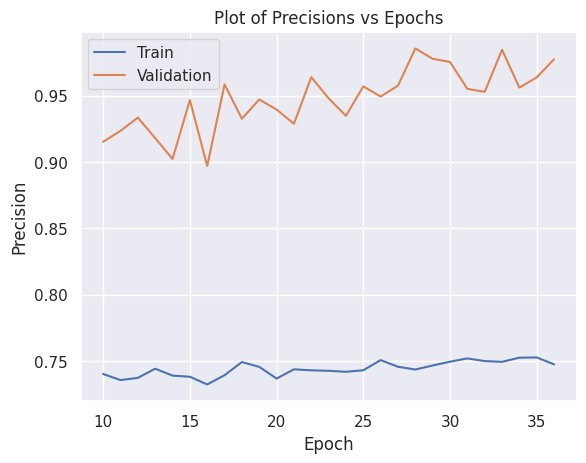

In [248]:
# plotting
sns.set_theme()
fig, ax1 = plt.subplots()

# plot epoch vs train precision
ax1.plot(history['epoch'], history['train_precision'], label='Train')

# superimpose epoch vs validation precision
ax1.plot(history['epoch'], history['validation_precision'], label='Validation')

# legend
ax1.legend()

# title
ax1.set_title('Plot of Precisions vs Epochs')

# labels
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Precision')

plt.show()

## Evaluation on the Test Data

In [249]:
# define model with best config
model = ClassificationNet(input_size=20, l0=best_config['l0'], l1=best_config['l1'], l2=best_config['l2'], dropout_rate=best_config['dropout_rate'])

# load model
path = './best_model.pth'
model.load_state_dict(torch.load(path, weights_only=True))

# load test data
test_loader = data.DataLoader(test_dataset, batch_size=best_config['batch_size'], num_workers=2)

# evaluate on test data using test_func
test_precision, report = test_func(model=model, test_loader=test_loader, device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

print(f'Precision on Test Data: {test_precision:.4f}')
print(report) # print classification report

Precision on Test Data: 0.9625
{'0.0': {'precision': 0.8178694158075601, 'recall': 0.9975233377786245, 'f1-score': 0.8988069693588533, 'support': 5249.0}, '1.0': {'precision': 0.962536023054755, 'recall': 0.22266666666666668, 'f1-score': 0.36166756903086084, 'support': 1500.0}, 'accuracy': 0.8253074529559935, 'macro avg': {'precision': 0.8902027194311576, 'recall': 0.6100950022226456, 'f1-score': 0.630237269194857, 'support': 6749.0}, 'weighted avg': {'precision': 0.8500223141437273, 'recall': 0.8253074529559935, 'f1-score': 0.7794249719530171, 'support': 6749.0}}


In [250]:
# store metrics
summary = {
    'Model' : [],
    'Recall' : [],
    'Precision' : [],
    'F1-score' : []
}
summary['Model'].append('Neural Network')
summary['Precision'].append(test_precision)
summary['Recall'].append(report['1.0']['recall'])
summary['F1-score'].append(report['1.0']['f1-score'])

# Training with TabNet

In [209]:
try:
  from pytorch_tabnet.tab_model import TabNetClassifier
  from pytorch_tabnet.metrics import Metric
except ImportError:
  !pip install pytorch-tabnet
  from pytorch_tabnet.tab_model import TabNetClassifier
  from pytorch_tabnet.metrics import Metric


## Hyperparameter Tuning

In [210]:
def train_loanapproval_tabnet(config, train_sets, val_sets, test_sets):
  # load data
  X_train, y_train = train_sets
  X_validation, y_validation = val_sets
  X_test, y_test = test_sets

  # create a TabNetClassifier instance
  clf_tabnet = TabNetClassifier(
      n_d = config['n_d'],
      n_a = config['n_d'], # suggested same value with n_d
      n_steps = config['n_steps'],
      gamma = config['gamma'],
      n_independent = config['n_independent'],
      n_shared = config['n_shared'],
      seed = 1,
      momentum = config['momentum'],
      optimizer_fn = torch.optim.Adam,
      scheduler_fn=torch.optim.lr_scheduler.StepLR,  # Learning rate scheduler (default: StepLR)
      scheduler_params=dict(step_size=50, gamma=0.9)
  )
  # define a custom precision matrix
  class custom_precision(Metric):
    def __init__(self):
      self._name = "precision"  # Name of the metric
      self._maximize = True  # Whether to maximize or minimize the metric (precision)

    def __call__(self, y_true, y_score):
      y_pred = np.argmax(y_score, axis=1)  # Get predicted labels since
      return precision_score(y_true, y_pred) # return precision

  # fit
  clf_tabnet.fit(
      X_train = X_train.values,
      y_train = y_train,
      eval_set = [(X_validation.values, y_validation)],
      eval_name = ['validation'],
      eval_metric = ['precision'],
      max_epochs = 20, # run hypertuning with a low epoch number
      patience = 20,
      weights = 1, # for imbalanced data
      batch_size = 1024,
      virtual_batch_size = 128,
      num_workers = 2
  )

  # access best precision
  best_precision = max(clf_tabnet.history['validation_precision']) # return the best precision from the history of validation_precision

  # report to ray train
  train.report({'validation_precision':best_precision})

  print('Finished Training')

In [211]:
# define tabnet_tuner_func

def tabnet_tuner_func(search_space, num_samples):
  tuner = tune.Tuner(
      trainable = tune.with_parameters(train_loanapproval_tabnet, train_sets=(X_train,y_train), val_sets=(X_validation, y_validation), test_sets=(X_test,y_test)),
      param_space = search_space,
      tune_config = tune.TuneConfig(num_samples=num_samples, mode='max', metric='validation_precision')
  )

  # execute hyperparameter tuning
  results = tuner.fit()

  return results

### Search Space

In [212]:
# search space
search_space = {
    'n_d' : tune.choice([8, 16, 32]),
    'n_steps' : tune.choice([i for i in range(3,11)]),
    'gamma': tune.choice(np.arange(1.,2.1,0.1)),
    'n_independent' : tune.choice(np.arange(1,6)),
    'n_shared' : tune.choice(np.arange(1,6)),
    'momentum' : tune.choice([0.01,0.1,0.4]),
}

### Tuning

In [213]:
results = tabnet_tuner_func(search_space=search_space, num_samples=10)

2025-01-22 12:45:31,869	WARNING callback.py:136 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


+----------------------------------------------------------------------------------+
| Configuration for experiment     train_loanapproval_tabnet_2025-01-22_12-45-31   |
+----------------------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator                           |
| Scheduler                        FIFOScheduler                                   |
| Number of trials                 10                                              |
+----------------------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_loanapproval_tabnet_2025-01-22_12-45-31

Trial status: 10 PENDING
Current time: 2025-01-22 12:45:32. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+----------------------------------------------------------------------------------------------------------------------------+
| Trial name                              status       n_d

(train_loanapproval_tabnet pid=82052) /usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
(train_loanapproval_tabnet pid=82052)   warnings.warn(f"Device used : {self.device}")


(train_loanapproval_tabnet pid=82023) epoch 0  | loss: 0.43401 | validation_precision: 0.74374 |  0:00:04s
(train_loanapproval_tabnet pid=82023) epoch 1  | loss: 0.28714 | validation_precision: 0.69334 |  0:00:09s
(train_loanapproval_tabnet pid=82023) epoch 2  | loss: 0.27023 | validation_precision: 0.66196 |  0:00:15s

Trial status: 2 RUNNING | 8 PENDING
Current time: 2025-01-22 12:46:02. Total running time: 30s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+----------------------------------------------------------------------------------------------------------------------------+
| Trial name                              status       n_d     n_steps     gamma     n_independent     n_shared     momentum |
+----------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_tabnet_c430a_00000   RUNNING       32           3       1.5                 2            1         0.01 |
| train_loanapproval_tabnet_c4

(train_loanapproval_tabnet pid=82023) /usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
(train_loanapproval_tabnet pid=82023)   warnings.warn(wrn_msg)
(train_loanapproval_tabnet pid=82023) /usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
(train_loanapproval_tabnet pid=82023)   warnings.warn(f"Device used : {self.device}")


(train_loanapproval_tabnet pid=82023) Stop training because you reached max_epochs = 20 with best_epoch = 0 and best_validation_precision = 0.74374
(train_loanapproval_tabnet pid=82023) epoch 19 | loss: 0.22282 | validation_precision: 0.68533 |  0:01:41s [repeated 2x across cluster]

Trial train_loanapproval_tabnet_c430a_00000 completed after 1 iterations at 2025-01-22 12:47:28. Total running time: 1min 56s
+----------------------------------------------------------------+
| Trial train_loanapproval_tabnet_c430a_00000 result             |
+----------------------------------------------------------------+
| checkpoint_dir_name                                            |
| time_this_iter_s                                       105.036 |
| time_total_s                                           105.036 |
| training_iteration                                           1 |
| validation_precision                                   0.74374 |
+----------------------------------------------------

(train_loanapproval_tabnet pid=83161) /usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
(train_loanapproval_tabnet pid=83161)   warnings.warn(f"Device used : {self.device}")


(train_loanapproval_tabnet pid=82052) epoch 6  | loss: 0.29689 | validation_precision: 0.58949 |  0:02:01s [repeated 2x across cluster]
(train_loanapproval_tabnet pid=83161) epoch 1  | loss: 0.37852 | validation_precision: 0.52627 |  0:00:11s [repeated 2x across cluster]

Trial status: 1 TERMINATED | 2 RUNNING | 7 PENDING
Current time: 2025-01-22 12:48:02. Total running time: 2min 30s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: c430a_00000 with validation_precision=0.7437395659432388 and params={'n_d': 32, 'n_steps': 3, 'gamma': 1.5000000000000004, 'n_independent': 2, 'n_shared': 1, 'momentum': 0.01}
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                              status         n_d     n_steps     gamma     n_independent     n_shared     momentum     iter     total time (s)     validation_precision |
+------

(train_loanapproval_tabnet pid=83161) /usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
(train_loanapproval_tabnet pid=83161)   warnings.warn(wrn_msg)



Trial train_loanapproval_tabnet_c430a_00002 completed after 1 iterations at 2025-01-22 12:49:37. Total running time: 4min 5s
+----------------------------------------------------------------+
| Trial train_loanapproval_tabnet_c430a_00002 result             |
+----------------------------------------------------------------+
| checkpoint_dir_name                                            |
| time_this_iter_s                                       116.735 |
| time_total_s                                           116.735 |
| training_iteration                                           1 |
| validation_precision                                   0.65736 |
+----------------------------------------------------------------+
(train_loanapproval_tabnet pid=83161) Finished Training
(train_loanapproval_tabnet pid=83161) epoch 19 | loss: 0.25558 | validation_precision: 0.64177 |  0:01:51s
(train_loanapproval_tabnet pid=82052) epoch 13 | loss: 0.2631  | validation_precision: 0.66435 |  0:04:02s



(train_loanapproval_tabnet pid=84287) /usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
(train_loanapproval_tabnet pid=84287)   warnings.warn(f"Device used : {self.device}")


(train_loanapproval_tabnet pid=84287) epoch 0  | loss: 0.49696 | validation_precision: 0.59907 |  0:00:05s
(train_loanapproval_tabnet pid=84287) epoch 1  | loss: 0.28237 | validation_precision: 0.68347 |  0:00:11s

Trial status: 2 TERMINATED | 2 RUNNING | 6 PENDING
Current time: 2025-01-22 12:50:02. Total running time: 4min 30s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: c430a_00000 with validation_precision=0.7437395659432388 and params={'n_d': 32, 'n_steps': 3, 'gamma': 1.5000000000000004, 'n_independent': 2, 'n_shared': 1, 'momentum': 0.01}
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                              status         n_d     n_steps     gamma     n_independent     n_shared     momentum     iter     total time (s)     validation_precision |
+----------------------------------------------------------------

(train_loanapproval_tabnet pid=82052) /usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
(train_loanapproval_tabnet pid=82052)   warnings.warn(wrn_msg)


Trial status: 2 TERMINATED | 2 RUNNING | 6 PENDING
Current time: 2025-01-22 12:51:33. Total running time: 6min 1s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: c430a_00000 with validation_precision=0.7437395659432388 and params={'n_d': 32, 'n_steps': 3, 'gamma': 1.5000000000000004, 'n_independent': 2, 'n_shared': 1, 'momentum': 0.01}
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                              status         n_d     n_steps     gamma     n_independent     n_shared     momentum     iter     total time (s)     validation_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_tabnet_c430a_00001   RUNNING         32           9       1.6                 

(train_loanapproval_tabnet pid=84287) /usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
(train_loanapproval_tabnet pid=84287)   warnings.warn(wrn_msg)


(train_loanapproval_tabnet pid=84287) epoch 19 | loss: 0.21736 | validation_precision: 0.69917 |  0:01:47s [repeated 2x across cluster]
(train_loanapproval_tabnet pid=84287) Stop training because you reached max_epochs = 20 with best_epoch = 16 and best_validation_precision = 0.73217

Trial train_loanapproval_tabnet_c430a_00003 completed after 1 iterations at 2025-01-22 12:51:39. Total running time: 6min 7s
+----------------------------------------------------------------+
| Trial train_loanapproval_tabnet_c430a_00003 result             |
+----------------------------------------------------------------+
| checkpoint_dir_name                                            |
| time_this_iter_s                                       111.011 |
| time_total_s                                           111.011 |
| training_iteration                                           1 |
| validation_precision                                   0.73217 |
+----------------------------------------------------

(train_loanapproval_tabnet pid=85409) /usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
(train_loanapproval_tabnet pid=85409)   warnings.warn(f"Device used : {self.device}")


(train_loanapproval_tabnet pid=85408) epoch 0  | loss: 0.55334 | validation_precision: 0.56322 |  0:00:07s
(train_loanapproval_tabnet pid=82052) Finished Training

Trial status: 4 TERMINATED | 2 RUNNING | 4 PENDING
Current time: 2025-01-22 12:52:03. Total running time: 6min 31s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: c430a_00000 with validation_precision=0.7437395659432388 and params={'n_d': 32, 'n_steps': 3, 'gamma': 1.5000000000000004, 'n_independent': 2, 'n_shared': 1, 'momentum': 0.01}
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                              status         n_d     n_steps     gamma     n_independent     n_shared     momentum     iter     total time (s)     validation_precision |
+-------------------------------------------------------------------------------------------------------------------

(train_loanapproval_tabnet pid=85408) /usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
(train_loanapproval_tabnet pid=85408)   warnings.warn(wrn_msg)
(train_loanapproval_tabnet pid=85408) /usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
(train_loanapproval_tabnet pid=85408)   warnings.warn(f"Device used : {self.device}")


(train_loanapproval_tabnet pid=85408) Stop training because you reached max_epochs = 20 with best_epoch = 17 and best_validation_precision = 0.70611
Trial status: 4 TERMINATED | 2 RUNNING | 4 PENDING
Current time: 2025-01-22 12:55:03. Total running time: 9min 31s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: c430a_00000 with validation_precision=0.7437395659432388 and params={'n_d': 32, 'n_steps': 3, 'gamma': 1.5000000000000004, 'n_independent': 2, 'n_shared': 1, 'momentum': 0.01}
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                              status         n_d     n_steps     gamma     n_independent     n_shared     momentum     iter     total time (s)     validation_precision |
+----------------------------------------------------------------------------------------------------------------------------------

(train_loanapproval_tabnet pid=87066) /usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
(train_loanapproval_tabnet pid=87066)   warnings.warn(f"Device used : {self.device}")


(train_loanapproval_tabnet pid=85409) epoch 16 | loss: 0.24296 | validation_precision: 0.64898 |  0:03:33s

Trial status: 5 TERMINATED | 2 RUNNING | 3 PENDING
Current time: 2025-01-22 12:55:33. Total running time: 10min 1s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: c430a_00000 with validation_precision=0.7437395659432388 and params={'n_d': 32, 'n_steps': 3, 'gamma': 1.5000000000000004, 'n_independent': 2, 'n_shared': 1, 'momentum': 0.01}
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                              status         n_d     n_steps     gamma     n_independent     n_shared     momentum     iter     total time (s)     validation_precision |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

(train_loanapproval_tabnet pid=85409) /usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
(train_loanapproval_tabnet pid=85409)   warnings.warn(wrn_msg)


(train_loanapproval_tabnet pid=85409) Stop training because you reached max_epochs = 20 with best_epoch = 18 and best_validation_precision = 0.72758
(train_loanapproval_tabnet pid=85409) epoch 19 | loss: 0.24449 | validation_precision: 0.71686 |  0:04:11s [repeated 2x across cluster]

Trial train_loanapproval_tabnet_c430a_00005 completed after 1 iterations at 2025-01-22 12:56:11. Total running time: 10min 39s
+----------------------------------------------------------------+
| Trial train_loanapproval_tabnet_c430a_00005 result             |
+----------------------------------------------------------------+
| checkpoint_dir_name                                            |
| time_this_iter_s                                       260.902 |
| time_total_s                                           260.902 |
| training_iteration                                           1 |
| validation_precision                                   0.72758 |
+--------------------------------------------------

(train_loanapproval_tabnet pid=87539) /usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
(train_loanapproval_tabnet pid=87539)   warnings.warn(f"Device used : {self.device}")


(train_loanapproval_tabnet pid=87066) epoch 3  | loss: 0.37909 | validation_precision: 0.65929 |  0:01:09s

Trial status: 6 TERMINATED | 2 RUNNING | 2 PENDING
Current time: 2025-01-22 12:56:33. Total running time: 11min 1s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: c430a_00000 with validation_precision=0.7437395659432388 and params={'n_d': 32, 'n_steps': 3, 'gamma': 1.5000000000000004, 'n_independent': 2, 'n_shared': 1, 'momentum': 0.01}
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                              status         n_d     n_steps     gamma     n_independent     n_shared     momentum     iter     total time (s)     validation_precision |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

(train_loanapproval_tabnet pid=87539) /usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
(train_loanapproval_tabnet pid=87539)   warnings.warn(wrn_msg)



Trial train_loanapproval_tabnet_c430a_00007 completed after 1 iterations at 2025-01-22 13:00:19. Total running time: 14min 47s
+----------------------------------------------------------------+
| Trial train_loanapproval_tabnet_c430a_00007 result             |
+----------------------------------------------------------------+
| checkpoint_dir_name                                            |
| time_this_iter_s                                       236.399 |
| time_total_s                                           236.399 |
| training_iteration                                           1 |
| validation_precision                                   0.75131 |
+----------------------------------------------------------------+
(train_loanapproval_tabnet pid=87539) Finished Training
(train_loanapproval_tabnet pid=87066) epoch 16 | loss: 0.25498 | validation_precision: 0.57541 |  0:05:01s

Trial train_loanapproval_tabnet_c430a_00008 started with configuration:
+--------------------------------

(train_loanapproval_tabnet pid=89296) /usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
(train_loanapproval_tabnet pid=89296)   warnings.warn(f"Device used : {self.device}")



Trial status: 7 TERMINATED | 2 RUNNING | 1 PENDING
Current time: 2025-01-22 13:00:34. Total running time: 15min 2s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: c430a_00007 with validation_precision=0.7513104251601631 and params={'n_d': 16, 'n_steps': 7, 'gamma': 1.0, 'n_independent': 5, 'n_shared': 1, 'momentum': 0.1}
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                              status         n_d     n_steps     gamma     n_independent     n_shared     momentum     iter     total time (s)     validation_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_loanapproval_tabnet_c430a_00006   RUNNING         32           9       1.6                 1            4

(train_loanapproval_tabnet pid=87066) /usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
(train_loanapproval_tabnet pid=87066)   warnings.warn(wrn_msg)



Trial train_loanapproval_tabnet_c430a_00006 completed after 1 iterations at 2025-01-22 13:01:23. Total running time: 15min 51s
+----------------------------------------------------------------+
| Trial train_loanapproval_tabnet_c430a_00006 result             |
+----------------------------------------------------------------+
| checkpoint_dir_name                                            |
| time_this_iter_s                                       364.182 |
| time_total_s                                           364.182 |
| training_iteration                                           1 |
| validation_precision                                   0.72811 |
+----------------------------------------------------------------+
(train_loanapproval_tabnet pid=87066) Finished Training
(train_loanapproval_tabnet pid=89296) epoch 2  | loss: 0.35738 | validation_precision: 0.62683 |  0:00:58s

Trial status: 8 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2025-01-22 13:01:34. Total running time:

(train_loanapproval_tabnet pid=89727) /usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
(train_loanapproval_tabnet pid=89727)   warnings.warn(f"Device used : {self.device}")


(train_loanapproval_tabnet pid=89296) epoch 3  | loss: 0.31199 | validation_precision: 0.67263 |  0:01:16s
(train_loanapproval_tabnet pid=89727) epoch 0  | loss: 0.60118 | validation_precision: 0.65592 |  0:00:15s

Trial status: 8 TERMINATED | 2 RUNNING
Current time: 2025-01-22 13:02:04. Total running time: 16min 32s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
Current best trial: c430a_00007 with validation_precision=0.7513104251601631 and params={'n_d': 16, 'n_steps': 7, 'gamma': 1.0, 'n_independent': 5, 'n_shared': 1, 'momentum': 0.1}
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                              status         n_d     n_steps     gamma     n_independent     n_shared     momentum     iter     total time (s)     validation_precision |
+-------------------------------------------------------------------------------------------

(train_loanapproval_tabnet pid=89296) /usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
(train_loanapproval_tabnet pid=89296)   warnings.warn(wrn_msg)



Trial train_loanapproval_tabnet_c430a_00008 completed after 1 iterations at 2025-01-22 13:06:52. Total running time: 21min 20s
+----------------------------------------------------------------+
| Trial train_loanapproval_tabnet_c430a_00008 result             |
+----------------------------------------------------------------+
| checkpoint_dir_name                                            |
| time_this_iter_s                                       381.053 |
| time_total_s                                           381.053 |
| training_iteration                                           1 |
| validation_precision                                   0.69914 |
+----------------------------------------------------------------+
(train_loanapproval_tabnet pid=89296) Finished Training
(train_loanapproval_tabnet pid=89727) epoch 19 | loss: 0.22425 | validation_precision: 0.66381 |  0:05:18s
(train_loanapproval_tabnet pid=89727) Stop training because you reached max_epochs = 20 with best_epoch = 

(train_loanapproval_tabnet pid=89727) /usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
(train_loanapproval_tabnet pid=89727)   warnings.warn(wrn_msg)
2025-01-22 13:06:59,406	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/train_loanapproval_tabnet_2025-01-22_12-45-31' in 0.0144s.



Trial train_loanapproval_tabnet_c430a_00009 completed after 1 iterations at 2025-01-22 13:06:59. Total running time: 21min 27s
+---------------------------------------------------------------+
| Trial train_loanapproval_tabnet_c430a_00009 result            |
+---------------------------------------------------------------+
| checkpoint_dir_name                                           |
| time_this_iter_s                                       323.47 |
| time_total_s                                           323.47 |
| training_iteration                                          1 |
| validation_precision                                   0.7431 |
+---------------------------------------------------------------+

Trial status: 10 TERMINATED
Current time: 2025-01-22 13:06:59. Total running time: 21min 27s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
Current best trial: c430a_00007 with validation_precision=0.7513104251601631 and params={'n_d': 16, 'n_steps': 7, 'gamma': 1.0, 'n_independ

In [214]:
best_results = results.get_best_result()
best_config = best_results.config

## Model Training with Best Configuration

In [215]:
best_config

{'n_d': 16,
 'n_steps': 7,
 'gamma': 1.0,
 'n_independent': 5,
 'n_shared': 1,
 'momentum': 0.1}

In [216]:
clf_tabnet = TabNetClassifier(
    **best_config,
      seed = 1,
      optimizer_fn = torch.optim.Adam,
      scheduler_fn=torch.optim.lr_scheduler.StepLR,
      scheduler_params=dict(step_size=50, gamma=0.9)
  )

# define a custom precision matrix
class custom_precision(Metric):
  def __init__(self):
    self._name = "precision"  # Name of the metric
    self._maximize = True  # Whether to maximize or minimize the metric (precision)

  def __call__(self, y_true, y_score):
    y_pred = np.argmax(y_score, axis=1)
    return precision_score(y_true, y_pred) # return precision

clf_tabnet.fit(
    X_train = X_train.values,
    y_train = y_train,
    eval_set = [(X_validation.values, y_validation)],
    eval_name = ['validation'],
    eval_metric = ['precision'],
    max_epochs = 200,
    patience = 50,
    weights = 1, # for imbalanced data
    batch_size = 1024,
    virtual_batch_size = 128,
    num_workers = 2
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.5926  | validation_precision: 0.69332 |  0:00:06s
epoch 1  | loss: 0.28228 | validation_precision: 0.66616 |  0:00:12s
epoch 2  | loss: 0.26636 | validation_precision: 0.68916 |  0:00:18s
epoch 3  | loss: 0.24913 | validation_precision: 0.684   |  0:00:25s
epoch 4  | loss: 0.24184 | validation_precision: 0.66602 |  0:00:30s
epoch 5  | loss: 0.23397 | validation_precision: 0.7241  |  0:00:35s
epoch 6  | loss: 0.23666 | validation_precision: 0.67243 |  0:00:42s
epoch 7  | loss: 0.22935 | validation_precision: 0.68988 |  0:00:47s
epoch 8  | loss: 0.23025 | validation_precision: 0.69958 |  0:00:53s
epoch 9  | loss: 0.22613 | validation_precision: 0.68842 |  0:01:00s
epoch 10 | loss: 0.2249  | validation_precision: 0.6807  |  0:01:05s
epoch 11 | loss: 0.22546 | validation_precision: 0.67137 |  0:01:12s
epoch 12 | loss: 0.22653 | validation_precision: 0.68277 |  0:01:17s
epoch 13 | loss: 0.22446 | validation_precision: 0.70746 |  0:01:22s
epoch 14 | loss: 0.22196 | validat

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


## Evaluation on Test Data

In [217]:
# prediction on test data
y_pred_test = clf_tabnet.predict(X_test.values)

# model evaluation
precision = precision_score(y_test, y_pred_test)
print(f"precision: {precision:.4f}")
report_tabnet = classification_report(y_test, y_pred_test, output_dict=True)
print(report_tabnet)

precision: 0.7135
{'0': {'precision': 0.9518362432269717, 'recall': 0.9036006858449228, 'f1-score': 0.9270914777169664, 'support': 5249.0}, '1': {'precision': 0.7134767836919592, 'recall': 0.84, 'f1-score': 0.771586037966932, 'support': 1500.0}, 'accuracy': 0.889465105941621, 'macro avg': {'precision': 0.8326565134594655, 'recall': 0.8718003429224614, 'f1-score': 0.8493387578419492, 'support': 6749.0}, 'weighted avg': {'precision': 0.8988596260536841, 'recall': 0.889465105941621, 'f1-score': 0.8925295930488598, 'support': 6749.0}}


## Model Training with Default Parameters

### Tuning

In [218]:
# create a TabNetClassifier instance
clf_tabnet_d = TabNetClassifier(
    n_d = 8,
    n_a = 8, # suggested same value with n_d
    n_steps = 3,
    gamma = 1.3,
    n_independent = 2,
    n_shared = 2,
    seed = 1,
    momentum = 0.02,
    optimizer_fn = torch.optim.Adam,
    scheduler_fn=torch.optim.lr_scheduler.StepLR,  # Learning rate scheduler
    scheduler_params=dict(step_size=50, gamma=0.9),
    )

# fit
clf_tabnet_d.fit(
    X_train = X_train.values,
    y_train = y_train,
    eval_set = [(X_validation.values, y_validation)],
    eval_name = ['validation'],
    eval_metric = ['precision'],
    max_epochs = 200,
    patience = 50,
    weights = 1, # for imbalanced data
    batch_size = 1024,
    virtual_batch_size = 128,
    num_workers = 2
    )

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.41739 | validation_precision: 0.58889 |  0:00:02s
epoch 1  | loss: 0.27048 | validation_precision: 0.61584 |  0:00:04s
epoch 2  | loss: 0.2519  | validation_precision: 0.61562 |  0:00:08s
epoch 3  | loss: 0.24766 | validation_precision: 0.63289 |  0:00:10s
epoch 4  | loss: 0.24494 | validation_precision: 0.64476 |  0:00:12s
epoch 5  | loss: 0.23835 | validation_precision: 0.61795 |  0:00:15s
epoch 6  | loss: 0.23703 | validation_precision: 0.65437 |  0:00:17s
epoch 7  | loss: 0.23188 | validation_precision: 0.69513 |  0:00:19s
epoch 8  | loss: 0.22789 | validation_precision: 0.67386 |  0:00:23s
epoch 9  | loss: 0.23067 | validation_precision: 0.65604 |  0:00:25s
epoch 10 | loss: 0.22666 | validation_precision: 0.6856  |  0:00:27s
epoch 11 | loss: 0.22504 | validation_precision: 0.68241 |  0:00:30s
epoch 12 | loss: 0.22512 | validation_precision: 0.71489 |  0:00:32s
epoch 13 | loss: 0.22388 | validation_precision: 0.69429 |  0:00:35s
epoch 14 | loss: 0.22934 | validat

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


## Feature Importances

In [219]:
feature_importances = pd.Series(clf_tabnet.feature_importances_, index=X_train.columns.to_list())
print(feature_importances)

person_age                        0.027888
person_gender                     0.010112
person_education                  0.000000
person_income                     0.061571
person_emp_exp                    0.050067
loan_amnt                         0.000989
loan_int_rate                     0.078518
loan_percent_income               0.010337
cb_person_cred_hist_length        0.041296
credit_score                      0.057481
previous_loan_defaults_on_file    0.483804
person_home_ownership_OWN         0.042758
person_home_ownership_RENT        0.042758
person_home_ownership_MORTGAGE    0.042758
loan_intent_DEBTCONSOLIDATION     0.008277
loan_intent_EDUCATION             0.008277
loan_intent_HOMEIMPROVEMENT       0.008277
loan_intent_MEDICAL               0.008277
loan_intent_PERSONAL              0.008277
loan_intent_VENTURE               0.008277
dtype: float64


In [220]:
group_idxs = [] # store groups of same categorical features
for feature in categorical_features:
  group_idxs.append([feature in key for key in feature_importances.keys()])

# sum the feature importances for each group

feature_importances_grouped = []

for feature, group_idx in zip(categorical_features,group_idxs):
  feature_importances_grouped.append(feature_importances.iloc[group_idx].sum())

feature_importances_grouped = pd.Series(feature_importances_grouped, index=categorical_features).sort_values(ascending=True)

print(feature_importances_grouped)

person_education                  0.000000
person_gender                     0.010112
loan_intent                       0.049663
person_home_ownership             0.128273
previous_loan_defaults_on_file    0.483804
dtype: float64


Merge the grouped importances for the categorical features with the original features

In [221]:
# merge features
feature_importances = pd.concat([feature_importances.loc[numerical_features], feature_importances_grouped]).sort_values(ascending=True)

Plot a hbar of the grouped feature importances

Text(0.5, 1.0, 'Feature Importances')

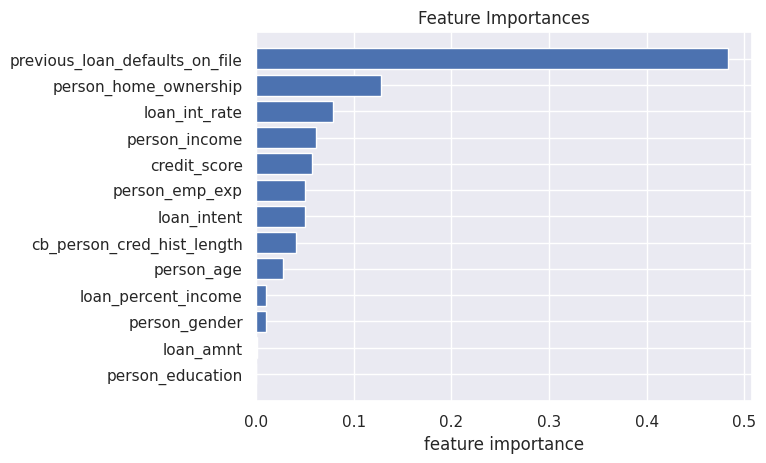

In [222]:
# create plot
fig, ax = plt.subplots()

# create barh axes
ax.barh(y = feature_importances.keys().to_list(), width = feature_importances)

# labels
ax.set_xlabel('feature importance')

# title
ax.set_title('Feature Importances')

## Evaluation on Test Data

In [223]:
# prediction on test data
y_pred_test = clf_tabnet_d.predict(X_test.values)

# model evaluation
precision_d = precision_score(y_test, y_pred_test)
print(f"precision: {precision_d:.4f}")
report_tabnet_d = classification_report(y_test, y_pred_test, output_dict=True)
print(report_tabnet_d)

precision: 0.7237
{'0': {'precision': 0.9594267258780783, 'recall': 0.9055058106305963, 'f1-score': 0.9316867587964324, 'support': 5249.0}, '1': {'precision': 0.7236768802228413, 'recall': 0.866, 'f1-score': 0.7884673748103187, 'support': 1500.0}, 'accuracy': 0.8967254408060453, 'macro avg': {'precision': 0.8415518030504598, 'recall': 0.8857529053152982, 'f1-score': 0.8600770668033755, 'support': 6749.0}, 'weighted avg': {'precision': 0.9070301088262402, 'recall': 0.8967254408060453, 'f1-score': 0.8998555132816642, 'support': 6749.0}}


Select the model that yields the better precision.

In [224]:
# selects the model with the higher precision
clf_tabnet = clf_tabnet if precision > precision_d else clf_tabnet_d
report_tabnet = report_tabnet if precision > precision_d else report_tabnet_d
precision = precision if precision > precision_d else precision_d


In [225]:
# store metrics
summary['Model'].append('Neural Network')
summary['Precision'].append(precision)
summary['Recall'].append(report_tabnet['1']['recall'])
summary['F1-score'].append(report_tabnet['1']['f1-score'])

# Summary

Summary of precisions for Neural Networks and TabNet

In [226]:
display(pd.DataFrame(summary))

Model  Recall  Precision  F1-score
0  Neural Network   0.558   0.927938  0.696919
1  Neural Network   0.866   0.723677  0.788467